**<p align="center"><span style="color:#00cc00; text-decoration:underline; font-size:1.5em;"><i>FINAL PROYECT JOF</i></span></p>**

**<p align="center"><span style="color:#00cc00; text-decoration:underline; font-size:1.2em;"><i>Generación de Energía Renovable y Condiciones Meteorológicas Conditions</i></span></p>**

*<p align="center"><span style="color:#00cc00; text-decoration:underline; font-size:1.2em;"><i>Renewable Power Generation and weather Conditions</i></span></p>*

![alt text](vecteezy_solar-panel-with-blue-sky-and-sunset-concept-clean-energy_8423306.jpg)

## <span style="color:#00cc00;"><u>Definición del problema:</u></span>

## *<span style="color:#00cc00;"><u>Problem Definition:</u></span>*

**¡Hola a todos! Somos estudiantes del Bootcamp de Ciencia de Datos y Aprendizaje Automático: Javier Serrano, Olga Kurganova y Fernando Tejada. Para nuestro proyecto final, hemos decidido trabajar con un conjunto de datos que registra la energía recolectada por un panel solar en una ubicación geográfica específica. Además, el conjunto de datos incluye variables relacionadas con las condiciones climáticas, el tiempo cronológico y la variación en la cantidad de energía producida, todas las cuales pueden influir en la cantidad de radiación solar que el panel recoge, incluida la "Irradiancia Global Horizontal" (IGH):**

*Hello everyone! We are students of the Data Science & Machine Learning Bootcamp: Javier Serrano, Olga Kurganova, and Fernando Tejada. For our final project, we have decided to work with a dataset that records the energy collected by a solar panel in a specific geographical location. Additionally, the dataset includes variables related to weather conditions, chronological time and the variation in the amount of energy produced, all of which can influence in the amount of solar radiation the panel collects, including the "Global Horizontal Irradiance" (GHI):*

- `Time`                                      
- `Energy delta [Wh]`  **(target)**                        
- `GHI` (Global Horizontal Irradiance)        
- `Temp`                                     
- `Pressure`                                
- `Humidity`
- `Wind_speed`                                  
- `Rain_1h`                                  
- `Snow_1h`                                 
- `Clouds_all`                                
- `isSun_category`                                     
- `SunlightTime`                             
- `DayLength`                                 
- `SunlightTime/dayLength`                    
- `Weather_type`                             
- `Hour`                                     
- `Month`    

**Gracias a este conjunto de datos, podremos crear un modelo de Aprendizaje Automático que nos permita determinar si la instalación de paneles solares es viable basándonos en la cantidad de energía que pueden recolectar (`Energy delta [Wh]`) y las condiciones climáticas en el sitio de instalación elegido. De esta manera, crearemos una herramienta que permita tanto a individuos locales como a empresas del sector energético verificar si es rentable invertir en la instalación de paneles solares.**

*Thanks to this dataset, we will be able to create a Machine Learning model that allows us to determine whether the installation of solar panels is viable based on the amount of energy they can collect and the weather conditions at the chosen installation site. In this way, we will create a tool that enables both local individuals and energy sector companies to verify whether it is profitable to invest in the installation of solar panels.*

## <span style="color:#00cc00;"><u>Obtención y carga del conjunto de datos:</u></span>

## *<span style="color:#00cc00;"><u>Data Acquisition and Loading:</u></span>*

In [2]:
# importacion de librerías
# import libraries

import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import optuna
from pickle import dump

In [3]:
raw_data = pd.read_csv("/workspaces/Proyecto-Final-JOF/data/raw/new_data.csv")
raw_data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0,very cloudy,1,January,No


**Hemos realizado un cambio en las variables `weather type`, `IsSun` y `month`, conviertiéndolas en categóricas.**
**`IsSun` ahora pasa a llamarse como se refleja en el conjunto de datos `IsSun_category`.**

*We have made a change to the variables `weather type`, `IsSun`, and `month`, converting them into categorical variables.*
*`IsSun` is now renamed as reflected in the dataset to `IsSun_category`.*

## <span style="color:#00cc00;"><u>Almacenamiento de la información:</u></span>

## *<span style="color:#00cc00;"><u>Information Storage:</u></span>*

In [4]:
engine = create_engine('sqlite:///solar_data.db')

In [5]:
raw_data.to_sql('solar_data', engine, index=False, if_exists='replace')

196776

In [6]:
# Consulta 1: Los 5 registros de energy delta más altos
# Query 1: The 5 highest records of energy delta

query1 = """
SELECT * FROM solar_data
ORDER BY "Energy delta[Wh]" DESC
LIMIT 5
"""
top_5_energy_delta = pd.read_sql(query1, engine)
print("Top 5 registros de Energy delta más altos:")
print("Top 5 highest records of Energy delta:")

top_5_energy_delta

Top 5 registros de Energy delta más altos:
Top 5 highest records of Energy delta:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2021-04-28 10:30:00,5020,204.9,12.7,1011,39,5.9,0.0,0.0,68,435,900,0.48,cloudy,10,April,Yes
1,2018-03-17 10:45:00,4913,148.5,-3.0,1019,43,8.2,0.0,0.0,95,345,705,0.49,very cloudy,10,March,Yes
2,2020-03-22 11:00:00,4897,167.5,2.7,1038,39,5.0,0.0,0.0,58,375,735,0.51,cloudy,11,March,Yes
3,2019-05-07 10:15:00,4887,138.3,10.3,1017,50,4.7,0.0,0.0,65,435,930,0.47,cloudy,10,May,Yes
4,2017-04-30 10:45:00,4877,184.8,9.2,1024,57,4.7,0.0,0.0,76,450,900,0.50,cloudy,10,April,Yes


In [7]:
# Consulta 2: Los 5 registros de energy delta más bajos a las 12:00 (Time)
# Query 2: The 5 lowest records of energy delta at 12:00 (Time)
query2 = """
SELECT * FROM solar_data
WHERE strftime('%H', Time) = '12'
ORDER BY "Energy delta[Wh]" ASC
LIMIT 5
"""

lowest_5_energy_delta_noon = pd.read_sql(query2, engine)
print("Top 5 registros de Energy delta más bajos a las 12:00:")
print("Top 5 lowest records of Energy delta at 12:00:")

lowest_5_energy_delta_noon

Top 5 registros de Energy delta más bajos a las 12:00:
Top 5 lowest records of Energy delta at 12:00:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2017-05-01 12:00:00,0,128.2,14.2,1019,49,6.8,0.0,0.0,21,525,900,0.58,a little bit cloudy,12,May,Yes
1,2017-05-20 12:00:00,0,95.3,15.5,1019,75,5.5,0.0,0.0,100,570,975,0.58,very cloudy,12,May,Yes
2,2017-05-20 12:15:00,0,88.2,15.5,1019,75,5.5,0.0,0.0,100,585,975,0.60,very cloudy,12,May,Yes
3,2017-05-20 12:30:00,0,99.8,15.5,1019,75,5.5,0.0,0.0,100,600,975,0.62,very cloudy,12,May,Yes
4,2017-05-20 12:45:00,0,102.8,15.5,1019,75,5.5,0.0,0.0,100,615,975,0.63,very cloudy,12,May,Yes


In [8]:
# Consulta 3: Los 2 registros de energy delta más altos con GHI y nubes más altos
# Query 3: The 2 highest energy delta records with highest GHI and clouds

query3 = """
SELECT * FROM solar_data
ORDER BY "Energy delta[Wh]" DESC, GHI DESC, clouds_all DESC
LIMIT 2
"""

top_2_energy_delta_ghi_clouds = pd.read_sql(query3, engine)
print("Top 2 registros de Energy delta más altos con GHI y nubes más altos:")
print("Top 2 highest records of Energy delta with highest GHI and clouds:")

top_2_energy_delta_ghi_clouds

Top 2 registros de Energy delta más altos con GHI y nubes más altos:
Top 2 highest records of Energy delta with highest GHI and clouds:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2021-04-28 10:30:00,5020,204.9,12.7,1011,39,5.9,0.0,0.0,68,435,900,0.48,cloudy,10,April,Yes
1,2018-03-17 10:45:00,4913,148.5,-3.0,1019,43,8.2,0.0,0.0,95,345,705,0.49,very cloudy,10,March,Yes


In [9]:
# Definir las consultas SQL para calcular el sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365
# Define SQL queries to calculate the total sum of captured energy (Energy delta [Wh]) divided by 365

queries = [
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2017 FROM solar_data
    WHERE Time BETWEEN '2017-01-01' AND '2017-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2018 FROM solar_data
    WHERE Time BETWEEN '2018-01-01' AND '2018-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2019 FROM solar_data
    WHERE Time BETWEEN '2019-01-01' AND '2019-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2020 FROM solar_data
    WHERE Time BETWEEN '2020-01-01' AND '2020-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2021 FROM solar_data
    WHERE Time BETWEEN '2021-01-01' AND '2021-12-31'
    """
]

# Ejecutar las consultas y mostrar los resultados
# Execute the queries and display the results

for i, query in enumerate(queries, start=2017):
    result = pd.read_sql(query, engine)
    print(f"Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año {i}:")
    print(f"Total sum of captured energy (Energy delta [Wh]) divided by 365 for the year {i}:")
    print(result)

Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2017:
Total sum of captured energy (Energy delta [Wh]) divided by 365 for the year 2017:
   energy_per_day_2017
0                49947
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2018:
Total sum of captured energy (Energy delta [Wh]) divided by 365 for the year 2018:
   energy_per_day_2018
0                58262
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2019:
Total sum of captured energy (Energy delta [Wh]) divided by 365 for the year 2019:
   energy_per_day_2019
0                53339
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2020:
Total sum of captured energy (Energy delta [Wh]) divided by 365 for the year 2020:
   energy_per_day_2020
0                53964
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2021:
Total sum of c

In [10]:
raw_data.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,hour
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,211.721094,748.644347,0.265187,11.498902
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,273.902186,194.870208,0.329023,6.921887
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,570.000000,0.000000,5.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,30.000000,765.000000,0.050000,11.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,390.000000,930.000000,0.530000,17.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1020.000000,1020.000000,1.000000,23.000000


In [11]:
variables = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']

# Calcula la moda para cada variable
# Calculate the mode for each variable

for var in variables:
    moda = raw_data[var].mode()[0]
    print(f'La moda de {var} es: {moda}')
    print(f'The mode of {var} is: {moda}')

La moda de Energy delta[Wh] es: 0
The mode of Energy delta[Wh] is: 0
La moda de GHI es: 0.0
The mode of GHI is: 0.0
La moda de temp es: 4.8
The mode of temp is: 4.8
La moda de pressure es: 1018
The mode of pressure is: 1018
La moda de humidity es: 94
The mode of humidity is: 94
La moda de wind_speed es: 2.2
The mode of wind_speed is: 2.2
La moda de rain_1h es: 0.0
The mode of rain_1h is: 0.0
La moda de snow_1h es: 0.0
The mode of snow_1h is: 0.0
La moda de clouds_all es: 100
The mode of clouds_all is: 100
La moda de sunlightTime es: 0
The mode of sunlightTime is: 0
La moda de dayLength es: 1020
The mode of dayLength is: 1020
La moda de SunlightTime/daylength es: 0.0
The mode of SunlightTime/daylength is: 0.0


## *<span style="color:#00cc00;"><u>Análisis descriptivo de variables:</u></span>*
## *<span style="color:#00cc00;"><u>Descriptive analysis of variables:</u></span>*


- **`Energy delta[Wh]`: con una moda de 0, se observa que está influenciada por los registros noctunos en los cuáles no hay presencia solar. El 75% de los datos se encuentran por debajo de los 577 Wh, áun existiendo un resgistro máximo de 5020 Wh, lo que indica la presencia de outliers.**
- *`Energy delta [Wh]`: with a mode of 0, it is observed that it is influenced by nighttime records where there is no solar presence. 75% of the data is below 577 Wh, even though there is a maximum record of 5020 Wh, indicating the presence of outliers.*

- **`GHI` (Global Horizontal Irradiance): con una moda igual a 0, se observa la misma situación que "Energy delta[Wh]" causado por los registros nocturnos. El 75% de los datos se encuentran por debajo de los 46.80, lo que indica que el dataset podría estar ubicado en una zona septentrional como podría ser Noruega, Rusia, Alaska o Japón.**
- *`GHI` (Global Horizontal Irradiance): with a mode equal to 0, the same situation as 'Energy delta[Wh]' caused by nighttime records is observed. 75% of the data is below 46.80, indicating that the dataset could be located in a northern zone such as Norway, Russia, Alaska, or Japan.*

- **`temp`: con una media de 9.79 º C y una moda de 4.8 º C se podría confirmar que el dataset es relativo a una zona como las mencionadas en `GHI`. No obstante, se observa un registro máximo de 35.80 ºC, lo que podría indicar presencia de outliers derivados del Calentamiento Global.**
- *`temp`: with a mean of 9.79°C and a mode of 4.8°C, it could be confirmed that the dataset is relative to an area like the ones mentioned in `GHI`. However, a maximum record of 35.80°C is observed, which could indicate the presence of outliers derived from Global Warming.*

- **`pressure`: tanto media (1015.29), como mediana (1016.00), como moda (1018) tienen unos valores cercanos, lo que sugiere una distribución fuertemente simétrica.**
- *`pressure`: both the mean (1015.29), the median (1016.00), and the mode (1018) have close values, suggesting a strongly symmetric distribution.*

- **`humidity`: la humedad en estos datos varía desde 22% hasta 100%, con una tendencia central hacia valores altos, como se evidencia por la mediana de 84% y la media de casi 80%.**
- *`humidity`: the humidity in these data ranges from 22% to 100%, with a central tendency towards high values, as evidenced by the median of 84% and the mean of almost 80%.*

- **`wind_speed`: la velocidad del viento varía desde 0 m/s hasta 14.3 m/s, con una velocidad promedio de aproximadamente 3.94 m/s. La mediana y los percentiles indican que la mayoría de las observaciones están en el rango de 2.6 m/s a 5.0 m/s, sugiriendo que velocidades más altas son menos comunes.**
- *`wind_speed`: the wind speed ranges from 0 m/s to 14.3 m/s, with an average speed of approximately 3.94 m/s. The median and percentiles indicate that most observations fall within the range of 2.6 m/s to 5.0 m/s, suggesting that higher speeds are less common.*

- **`rain_1h`: los valores en los percentiles 25, 50 y 75 son 0 mm/h. Esto sugiere que la precipitación es un evento relativamente raro en estos datos. Sin embargo, hay casos aislados donde se ha registrado hasta 8.09 mm de lluvia en una hora.**
- *rain_1h: the values at the 25th, 50th, and 75th percentiles are 0 mm/h. This suggests that precipitation is a relatively rare event in these data. However, there are isolated cases where up to 8.09 mm of rain has been recorded in one hour.*

- **`snow_1h`: los valores en los percentiles 25, 50 y 75 son todos 0 mm/h. Esto indica que la nieve es un evento muy raro en estos datos. No obstante, hay casos aislados donde se ha registrado hasta 2.82 mm de nieve en una hora.**
- *`snow_1h`: the values at the 25th, 50th, and 75th percentiles are all 0 mm/h. This indicates that snow is a very rare event in these data. However, there are isolated cases where up to 2.82 mm of snow has been recorded in one hour.*

- **`Clouds_all`: en cuanto a la distribución la cobertura nubosa varía considerablemente, lo que sugiere que el clima en el área de estudio puede ser muy variable. La mediana es considerablemente mayor que la media, indicando una distribución sesgada hacia valores más altos. Los outliers tienen valores extremos en 0% y 100% que son esperables en una variable de porcentaje de nubosidad.**
- *`Clouds_all`: in terms of distribution, cloud coverage varies considerably, suggesting that the weather in the study area may be highly variable. The median is considerably higher than the mean, indicating a distribution skewed towards higher values. Outliers have extreme values at 0% and 100%, which are expected in a percentage variable of cloudiness.*

- **`Sunlight_time`: la distribución del tiempo de luz solar tiene un amplio rango, con una alta desviación estándar que indica una variabilidad considerable entre los días. La mediana es mucho menor que la media, lo que indica que hay muchos días con poco o nada de luz solar y algunos días con mucho.**
- *`Sunlight_time`: the distribution of sunlight time has a wide range, with a high standard deviation indicating considerable variability between days. The median is much lower than the mean, indicating that there are many days with little or no sunlight and some days with a lot.*

- **`Day_length`: la duración del día muestra una variación significativa que refleja los cambios estacionales. La mediana y la media son relativamente cercanas, lo que sugiere una distribución relativamente simétrica. El rango es bastante amplio, de 450 a 1020 minutos, indicando variaciones importantes a lo largo del año.**
- *`Day_length`: the duration of the day shows significant variation reflecting seasonal changes. The median and mean are relatively close, suggesting a relatively symmetric distribution. The range is quite wide, from 450 to 1020 minutes, indicating significant variations throughout the year.*

- **`SunlightTime/daylength`: con una media de 0.27 y una mediana de solo 0.05, esta variable revela que en muchos días, la luz solar efectiva es una pequeña fracción del día total, reflejando una alta variabilidad y una distribución sesgada hacia valores bajos. Esta información es crucial para entender y optimizar la eficiencia de la generación de energía solar, destacando la necesidad de considerar factores climáticos y estacionales en la planificación energética.**
- *`SunlightTime/daylength`: with a mean of 0.27 and a median of only 0.05, this variable reveals that on many days, effective sunlight is a small fraction of the total day, reflecting high variability and a distribution skewed towards low values. This information is crucial for understanding and optimizing the efficiency of solar energy generation, highlighting the need to consider climatic and seasonal factors in energy planning.*

In [12]:
# Realizar pruebas de normalidad
# Perform tests of normality

def normality_tests(raw_data, column):
    stat_shapiro, p_shapiro = stats.shapiro(raw_data[column].dropna())
    stat_ks, p_ks = stats.kstest(raw_data[column].dropna(), 'norm')
    
    print(f'Shapiro-Wilk test for {column}: Statistics={stat_shapiro}, p-value={p_shapiro}')
    print(f'Kolmogorov-Smirnov test for {column}: Statistics={stat_ks}, p-value={p_ks}')
    
    if p_shapiro < 0.05:
        print(f'Rechazamos H0 para {column} en Shapiro-Wilk test: La variable no sigue una distribución normal\n')
    else:
        print(f'No podemos rechazar H0 para {column} en Shapiro-Wilk test: La variable sigue una distribución normal\n')
    
    if p_ks < 0.05:
        print(f'Rechazamos H0 para {column} en Kolmogorov-Smirnov test: La variable no sigue una distribución normal\n')
    else:
        print(f'No podemos rechazar H0 para {column} en Kolmogorov-Smirnov test: La variable sigue una distribución normal\n')

# Aplicar pruebas de normalidad a todas las columnas numéricas
for column in raw_data.select_dtypes(include=[np.number]).columns:
    normality_tests(raw_data, column)

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 196776.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for Energy delta[Wh]: Statistics=0.6159472853477984, p-value=2.9535462802344845e-169
Kolmogorov-Smirnov test for Energy delta[Wh]: Statistics=0.5, p-value=0.0
Rechazamos H0 para Energy delta[Wh] en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H0 para Energy delta[Wh] en Kolmogorov-Smirnov test: La variable no sigue una distribución normal

Shapiro-Wilk test for GHI: Statistics=0.6851074104571122, p-value=1.4306659251793563e-162
Kolmogorov-Smirnov test for GHI: Statistics=0.5, p-value=0.0
Rechazamos H0 para GHI en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H0 para GHI en Kolmogorov-Smirnov test: La variable no sigue una distribución normal

Shapiro-Wilk test for temp: Statistics=0.9906006415996702, p-value=7.657510668620788e-67
Kolmogorov-Smirnov test for temp: Statistics=0.7951321384259344, p-value=0.0
Rechazamos H0 para temp en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H

**Para todas las variables examinadas, los resultados de ambas pruebas llevaron al rechazo de la hipótesis nula (H0) de que las variables siguen una distribución normal. Los detalles son los siguientes:**

*For all examined variables, the results of both tests led to the rejection of the null hypothesis (H0) that the variables follow a normal distribution. The details are as follows:*

- **`Energy delta[Wh]`**

    Shapiro-Wilk: Estadística=0.616, p-valor=2.95e-169

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`GHI`**

    Shapiro-Wilk: Estadística=0.685, p-valor=1.43e-162

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`temp`**

    Shapiro-Wilk: Estadística=0.991, p-valor=7.66e-67

    Kolmogorov-Smirnov: Estadística=0.795, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`pressure`**

    Shapiro-Wilk: Estadística=0.991, p-valor=3.47e-65

    Kolmogorov-Smirnov: Estadística=1.0, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`humidity`**

    Shapiro-Wilk: Estadística=0.911, p-valor=3.04e-123

    Kolmogorov-Smirnov: Estadística=1.0, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`wind_speed`**

    Shapiro-Wilk: Estadística=0.967, p-valor=1.70e-96

    Kolmogorov-Smirnov: Estadística=0.888, p-valor=0.0

    Conclusión: No sigue una distribución normal.*

- **`rain_1h`**

    Shapiro-Wilk: Estadística=0.250, p-valor=8.23e-193

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`snow_1h`**

    Shapiro-Wilk: Estadística=0.079, p-valor=2.40e-200

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`clouds_all`**

    Shapiro-Wilk: Estadística=0.819, p-valor=1.07e-144

    Kolmogorov-Smirnov: Estadística=0.907, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`sunlightTime`**

    Shapiro-Wilk: Estadística=0.780, p-valor=6.58e-151

    Kolmogorov-Smirnov: Estadística=0.520, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`dayLength`**

    Shapiro-Wilk: Estadística=0.914, p-valor=3.75e-122

    Kolmogorov-Smirnov: Estadística=1.0, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`SunlightTime/daylength`**

    Shapiro-Wilk: Estadística=0.780, p-valor=7.06e-151

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **`hour`**

    Shapiro-Wilk: Estadística=0.951, p-valor=1.48e-106

    Kolmogorov-Smirnov: Estadística=0.894, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*





**En todas las pruebas realizadas, se rechazó la hipótesis nula de normalidad para las variables analizadas.**

*In all conducted tests, the null hypothesis of normality was rejected for the analyzed variables.*

## **<span style="color:#00cc00;"><u>Análisis descriptivo de variables:</u></span>**
## *<span style="color:#00cc00;"><u>Realiza un EDA completo:</u></span>*

* ### **<u>Exploración y limpieza de datos<u>**
* ### *Data exploration and cleaning*

In [13]:
raw_data.shape

(196776, 17)

**El tamaño total del dataset es: 17 filas y 196.776 columnas.**

*The total size of the dataset is: 17 rows and 196,776 columns.*

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  sunlightTime            196776 non-null  int64  
 11  dayLength               196776 non-null  int64  
 12  SunlightTime/daylength  196776 non-null  float64
 13  weather_type            196776 non-null  object 
 14  hour                

**El dataset contiene 4 variables categóricas (`Time`, `weather_type`, `month`, `isSun_category`) y 13 numéricas (`Energy delta[Wh]`, `GHI`, `temp`, `pressure`, `humidity`, `wind_speed`, `rain_1h`, `snow_1h`, `clouds_all`, `sunlightTime`, `dayLength`, `SunlightTime/daylength`, `hour`). Ninguna de las variables contiene valores nulos.**

*The dataset contains 4 categorical variables (`Time`, `weather_type`, `month`, `isSun_category`) and 13 numerical variables (`Energy delta[Wh]`, `GHI`, `temp`, `pressure`, `humidity`, `wind_speed`, `rain_1h`, `snow_1h`, `clouds_all`, `sunlightTime`, `dayLength`, `SunlightTime/daylength`, `hour`). None of the variables contain null values.*

In [15]:
# Verificar si hay duplicados en el DataFrame
# Check for duplicates in the DataFrame

duplicates = raw_data.duplicated().any()

# Imprimir el resultado
# Print the result

if duplicates:
    print("El DataFrame tiene duplicados.")
else:
    print("\033[94mEl DataFrame no tiene duplicados.\033[0m")

El DataFrame no tiene duplicados.


* **El análisis necesita una medida temporal cronológicamente hablando porque el cambio climatológico fluctua a lo largo del año, por lo tanto se necesita una referencia temporal. (`Time`, `month`, `sunlightTime`, `dayLength`, `SunlightTime/daylength`)**
* *The analysis needs a chronological time measure because climatological change fluctuates throughout the year, therefore a temporal reference is needed. (`Time`, `month`, `sunlightTime`, `dayLength`, `SunlightTime/daylength`)*

* **El análisis necesita de todas las variables relacionadas con el clima porque todas en mayor o menor medida pueden afectar a la cantidad de energía que puede recoger una placa solar incidiendo de manera directa en la intensidad de los rayos solares.(`weather_type`, `GHI`, `temp`, `pressure`, `humidity`, `wind_speed`, `rain_1h`, `snow_1h`, `clouds_all`, `isSun_category`)**
* *The analysis needs all weather-related variables because all of them, to a greater or lesser extent, can affect the amount of energy that a solar panel can collect by directly influencing the intensity of solar rays. (`weather_type`, `GHI`, `temp`, `pressure`, `humidity`, `wind_speed`, `rain_1h`, `snow_1h`, `clouds_all`, `isSun_category`)*

* **Por lo tanto la variable que menos valor aporta sería 'hour', ya que es un dato que viene implícito en la variable `Time`. Se procederá a dividir la variable `Time` en año, mes, día, hora y minuto en el análisis univariante.**
* *Therefore, the variable that contributes the least value would be 'hour', since it is a data that is implicit in the `Time` variable. The `Time` variable will be divided into year, month, day, hour, and minute in the univariate analysis.*

In [16]:
# Se procede a eliminar la variable 'hour'
# The variable 'hour' will be removed

total_data = raw_data[['Time', 'month', 'Energy delta[Wh]', 'weather_type', 'isSun_category', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']].copy()
total_data.head()

,Time,month,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
0,2017-01-01 00:00:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
1,2017-01-01 00:15:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
2,2017-01-01 00:30:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
3,2017-01-01 00:45:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
4,2017-01-01 01:00:00,January,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0


In [18]:
total_data.to_csv("/workspaces/Proyecto-Final-JOF/data/processed/total_data.csv")

## **<span style="color:#00cc00;"><u>Análisis univariante:</u></span>**
## *<span style="color:#00cc00;"><u>Univariate analysis:</u></span>*

### **Análisis de Variables Categóricas (`month`, `weather_type`, `IsSun_category`)**
### *Analysis of Categorical Variables (`month`, `wather_type`, `IsSun_category`)*

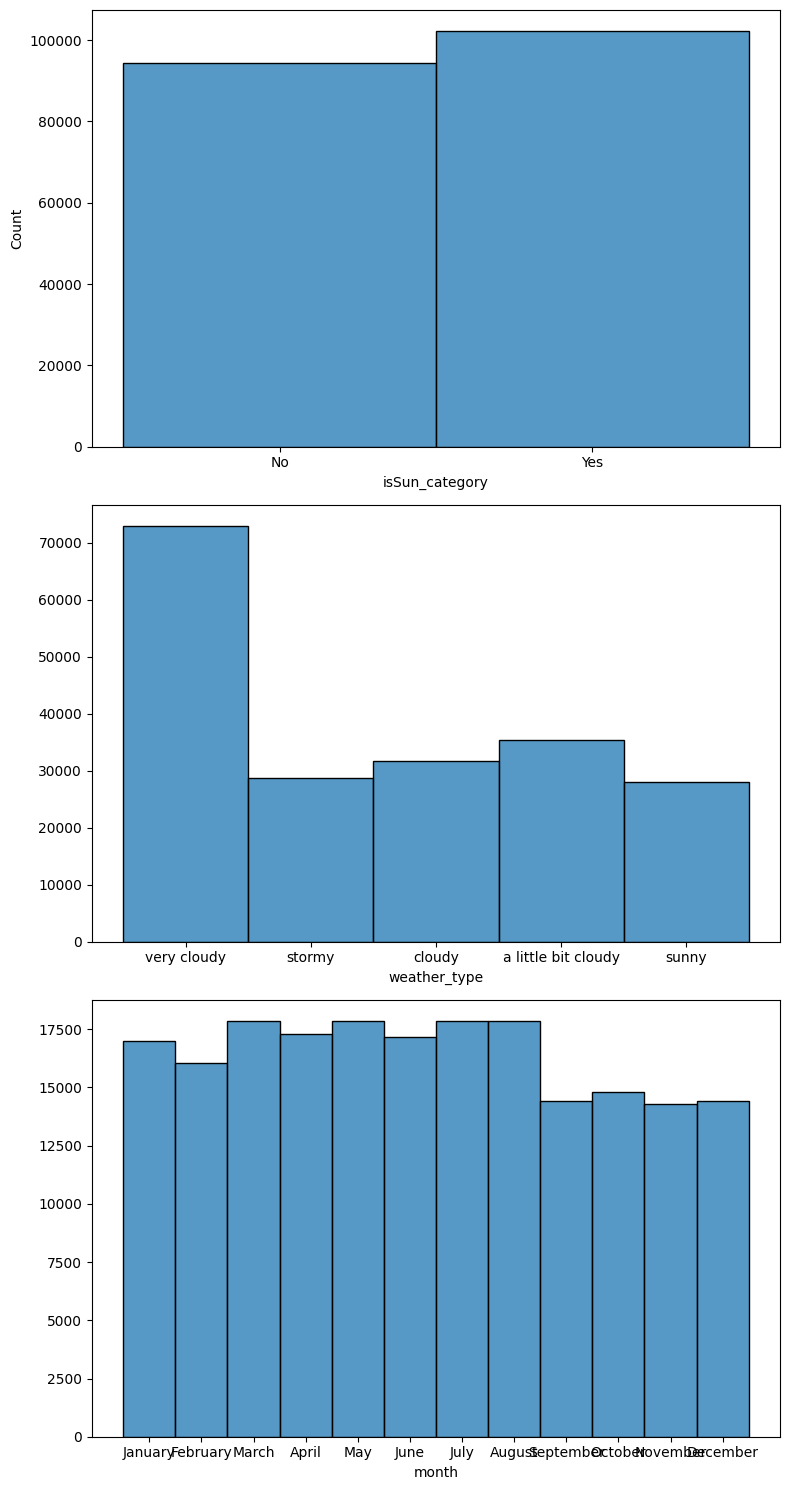

In [19]:
fig, axis = plt.subplots(3, 1, figsize = (8, 15))

# Crear un histograma múltiple
# Create a multiple histogram

sns.histplot(ax = axis[0], data = total_data, x = "isSun_category")
sns.histplot(ax = axis[1], data = total_data, x = "weather_type").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "month").set(ylabel = None)

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**En el tipo de clima en el que se registraron los datos prevalecen ligeramente los días soleados, no obstante también hay una cantidad de días muy nublados ('very cloudy') bastante elevada y diferenciada con respecto a los demás valores de `weather_type`. Como el registro de datos comienza en 2017-01-01 y termina el 2022-08-31, se observa que los 8 primeros meses contienen mayores registros.**

*In the weather type in which the data were recorded, sunny days slightly prevail; however, there is also a fairly high and differentiated number of 'very cloudy' days compared to the other values ​​of `weather_type`. Since the data recording begins on 2017-01-01 and ends on 2022-08-31, it is observed that the first 8 months contain more records.*

### **Análisis de Variables Numéricas (`Time`, `Energy delta[Wh]`, `GHI`. `temp`, `pressure`, `humidity`, `wind_speed`, `rain_1h`, `snow_1h`, `clouds_all`, `sunlightTime`, `dayLength`, `SunlightTime/daylength`)**

### *Analysis of Numerical Variables (`Time`, `Energy delta[Wh]`, `GHI`, `temp`, `pressure`, `humidity`, `wind_speed`, `rain_1h`, `snow_1h`, `clouds_all`, `sunlightTime`, `dayLength`, `SunlightTime/daylength`).*

**Previo al análisis de estas variables, hay que transformar la variable `Time` para su análisis**

*Before analyzing these variables, the `Time` variable needs to be transformed for analysis*

In [20]:
# diferenciamos bases de datos para mantener la variable 'month' como categórica
# We differentiate databases to keep the 'month' variable as categorical

total_data_timediv = total_data.copy()

In [21]:
total_data_timediv['Time'] = pd.to_datetime(total_data_timediv['Time'])

# Extraer Año, Mes y Hora
# Extract Year, Month, and Hour

total_data_timediv['year'] = total_data_timediv['Time'].dt.year
total_data_timediv['month'] = total_data_timediv['Time'].dt.month
total_data_timediv['day'] = total_data_timediv['Time'].dt.day
total_data_timediv['hour'] = total_data_timediv['Time'].dt.hour
total_data_timediv['minute'] = total_data_timediv['Time'].dt.minute

total_data.head()

,Time,month,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
0,2017-01-01 00:00:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
1,2017-01-01 00:15:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
2,2017-01-01 00:30:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
3,2017-01-01 00:45:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
4,2017-01-01 01:00:00,January,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0


In [22]:
total_data_timediv = total_data_timediv[['year', 'month', 'day', 'hour', 'minute', 'Energy delta[Wh]', 'weather_type', 'isSun_category',
       'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']].copy()

total_data_timediv.head()

,year,month,day,hour,minute,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
0,2017,1,1,0,0,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
1,2017,1,1,0,15,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
2,2017,1,1,0,30,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
3,2017,1,1,0,45,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
4,2017,1,1,1,0,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0


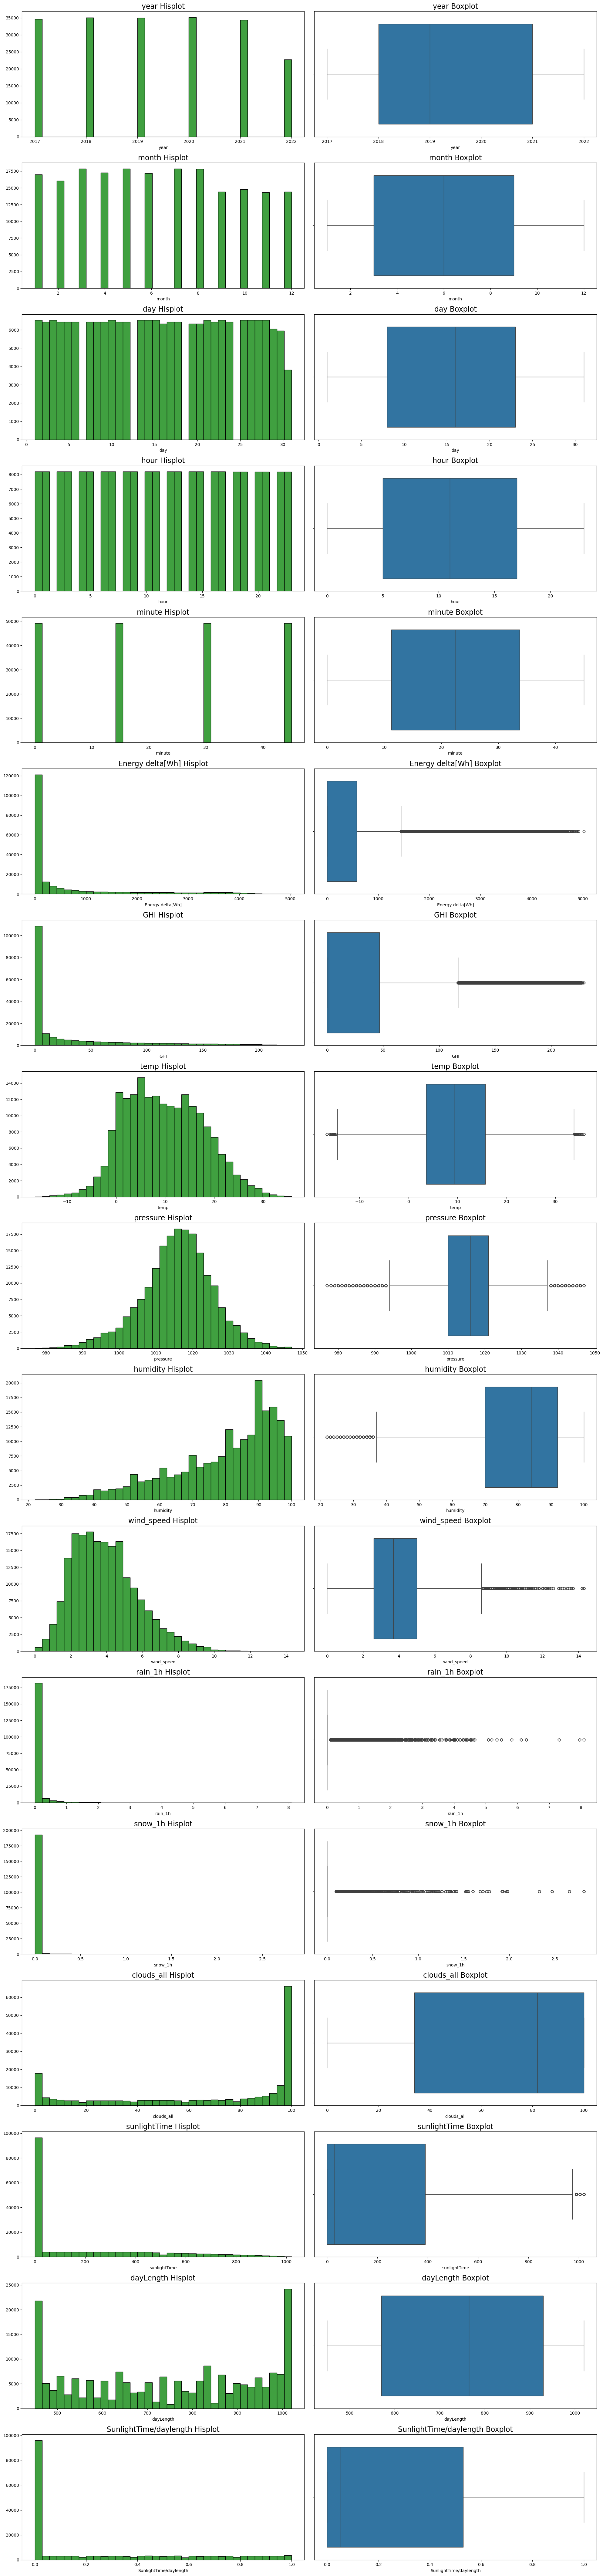

In [23]:
features = ['year', 'month', 'day', 'hour', 'minute', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
            'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']

# Crear subplots
# Create subplots

fig, axes = plt.subplots(len(features), 2, figsize=(20, 5*len(features)))

for i, feature in enumerate(features):

    # Histogram
    sns.histplot(ax=axes[i, 0], data=total_data_timediv, x=feature, bins=35, color='green').set(ylabel=None)
    axes[i, 0].set_title(f'{feature} Hisplot', fontdict={'fontsize': 17})
    
    #boxplot
    sns.boxplot(ax=axes[i, 1], data=total_data_timediv, x=feature)
    axes[i, 1].set_title(f'{feature} Boxplot', fontdict={'fontsize': 17})

plt.tight_layout()
plt.show()

- **`Year`: menor registros de datos en 2022.**
- *`Year`: fewer data records in 2022.*

- **`Month`: número menor de registros en septiembre, octubre, noviembre y diciembre ya que los datos terminan en 2022-08-31.**
- *`Month`: fewer records in September, October, November, and December since the data ends on 2022-08-31.*

- **`Day`: se observan menos registros los días 29, 30 y 31 ya que no todos los meses contienen ese número de días.**
- *`Day`: Fewer records are observed on the 29th, 30th, and 31st of the month since not all months contain that number of days.*

- **`Hour/minute`: resgitros simétricos y completos.**
- *`Hour/minute`: Symmetrical and complete records.*

- **`Energy Delta (Wh)`: gran amplitud de registros, pero debido a los registros nocturnos cuando no hay sol, registro = 0 es el de mayor incidencia.**
- *`Energy Delta (Wh)`: There is a wide range of records, but due to nighttime records when there is no sun, a record of 0 is the most frequent.*

- **`GHI`: gran amplitud de registros, pero debido a los registros nocturnos cuando no hay sol, registro = 0 es el de mayor incidencia.**
- *`GHI`: There is a wide range of records, but due to nighttime records when there is no sun, a record of 0 is the most frequent.*

- **`temp`: la mayor cantidad de registros se observan entre los 1 ºC y 20 ºC, aunque se ven registros extremos tanto por encima como debajo de ese rango.**
- *`temp`: The majority of records are observed between 1°C and 20°C, although extreme records are seen both above and below that range.*

- **`pressure`: la mayor cantidad de registros se observan entre los 1010 mbar y 1020 mbar, aunque se ven registros tanto por encima como debajo de ese rango.**
- *`Pressure`: The majority of records are observed between 1010 mbar and 1020 mbar, although records are seen both above and below that range.*

- **`humidity`: se observa un registro que tiende hacia la derecha, predominando registros con alta humedad y destacando el 90 %.**
- *`humidity`: A right-skewed distribution is observed, with predominance of records with high humidity, with 90% standing out.*

- **`wind_speed`: se observa un mayor registro de valores entre los 2 km/h y los 5 km/h, habiendo resgitros extremos por encima de este rango, aunque menos predominantes.**
- *`wind speed`: There is a higher occurrence of values ​​between 2 km/h and 5 km/h, with extreme records above this range, although less predominant.*

- **`rain_1h`: la mayor cantidad de registros se sitúan en los 0 l/m2, es por eso que todo registro poco por encima se considera un valor extremo, aunque en la realidad esos 
   registros extremos observados en el diagrama de caja no sean tan inusuales.**
- *`rain_1h` in the last hour: The majority of records are at 0 l/m2, which is why any record just above it is considered an extreme value, although in reality, those extreme 
   records observed in the boxplot may not be so unusual.*

- **`snow_1h`: la mayor cantidad de registros se sitúan en los 0 l/m2, es por eso que todo registro poco por encima se considera un valor extremo.**
- *`snow_1h` in the last hour: The majority of records are at 0 l/m2, which is why any record just above it is considered an extreme value.*

- **`clouds_all`: predominan los registros con un 100 % de nubosidad, aunque en 2º lugar se observan una cantidad alta de nubosidad con % muy bajo en comparación con el resto de 
  registros.**
- *`clouds_all`: Records with 100% cloudiness are predominant, although in second place, there are a high number of cloudy records with a very low percentage compared to the rest 
  of the records.*

- **`sunlightTime`: debido a los registros de noche, predominan los 0 min de sol, pero a lo largo del día se acumulan los minutos de sol con una tendencia cada vez menor.**
- *`sunlightTime`: Due to nighttime records, 0 minutes of sunlight prevail, but throughout the day, sunlight minutes accumulate with a decreasing trend over time.*

- **`dayLength`: se observan mayor cantidad de registros en ambos extremos, destacando la mayor cantidad de días cortos y la mayor cantidad de días largos.**
- *`dayLength`: A greater number of records are observed at both extremes, with a higher number of short days and a higher number of long days standing out.*

- **`SunlightTime/daylenth`: el registro acaba estando en función de 'sunlightTime', debido a la variación de las horas de sol a lo largo del año.**
- *`SunlightTime/daylength`: The record ends up depending on 'sunlightTime', due to the variation in hours of sunlight throughout the year.*

**Se analiza individualmente la variable `GHI` (Irradiancia Global Horizontal), ya que sus datos están sesgados por los registros nocturnos (GHI = 0). Al contrario que las otras variables climáticas, cuyo registro y presencia es o puede ser constante, la irradiación/tiempo solar solo puede ser medido en presencia del sol, es decir, durante las horas de sol. De esta manera, proyectaremos dos diagramas de cajas con los datos de las variables por encima de 0, para poder observar con mayor fidelidad los datos y la presencia de outliers. Filtrando los datos por encima de 0, nos aseguramos que los datos son solamente en presencia del sol.**

*We analyze the variable `GHI` (Global Horizontal Irradiance) individually, as its data is biased by nighttime records (GHI = 0). Unlike other climatic variables, whose recording and presence are or can be constant, solar irradiation can only be measured in the presence of the sun, i.e., during sunlight hours. Therefore, we will plot two boxplots with the data of the variables above 0, in order to observe the data and the presence of outliers more accurately. By filtering the data above 0, we ensure that the data are only recorded in the presence of the sun.*

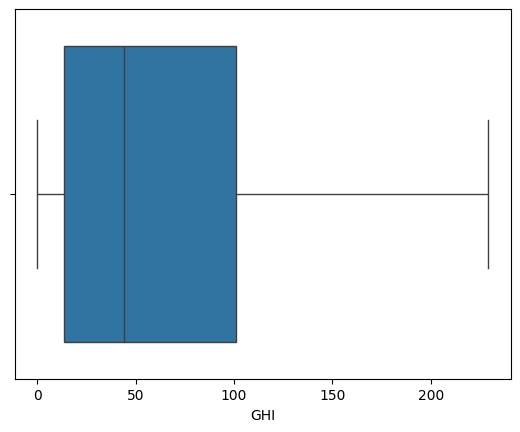

In [24]:
filtered_data = total_data[total_data['GHI'] > 0]


sns.boxplot( data=filtered_data, x= "GHI")
plt.show()

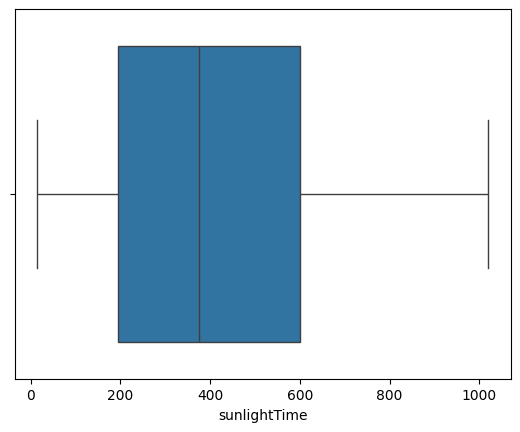

In [25]:
filtered_data = total_data[total_data['sunlightTime'] > 0]


sns.boxplot( data=filtered_data, x= "sunlightTime")
plt.show()

**Finalmente se muestran en el diagramas que los datos al parecer no contienen tanta presencia de outliers como aparecía teniendo en cuenta los registros = 0 de la misma. Por lo tanto se concluye que los datos de estas variables no presentan outliers.**

*Finally, the diagrams show that the data apparently do not contain as many outliers as appeared when considering the records = 0. Therefore, it is concluded that the data for these variables do not present outliers.*

## **<span style="color:#00cc00;"><u>Análisis multivariante:</u></span>**
## *<span style="color:#00cc00;"><u>Multivariate analysis:</u></span>*

### <u>Análisis Numérico - Numérico<u>

### <u>*Numerical-Numerical Analysis*<u>

**Analizamos las variables numéricas con las numéricas haciendo de `Energy Delta [Wh]` una comparación con las demas variables para poder sacar conclusiones mas claras acerca de sus relaciones y tomar decisiones sobre su procesamiento.**

*We analyze the numerical variables with the numerical ones by making `Energy Delta [Wh]` a comparison with the other variables in order to draw clearer conclusions about their relationships and make decisions about their processing.*

- **Relaciòn entre `Energy Delta [Wh]` / `GHI` y `Energy Delta [Wh]` / `temp`**

- *Relationship between `Energy Delta [Wh]` / `GHI` and `Energy Delta [Wh]` / `temp`*

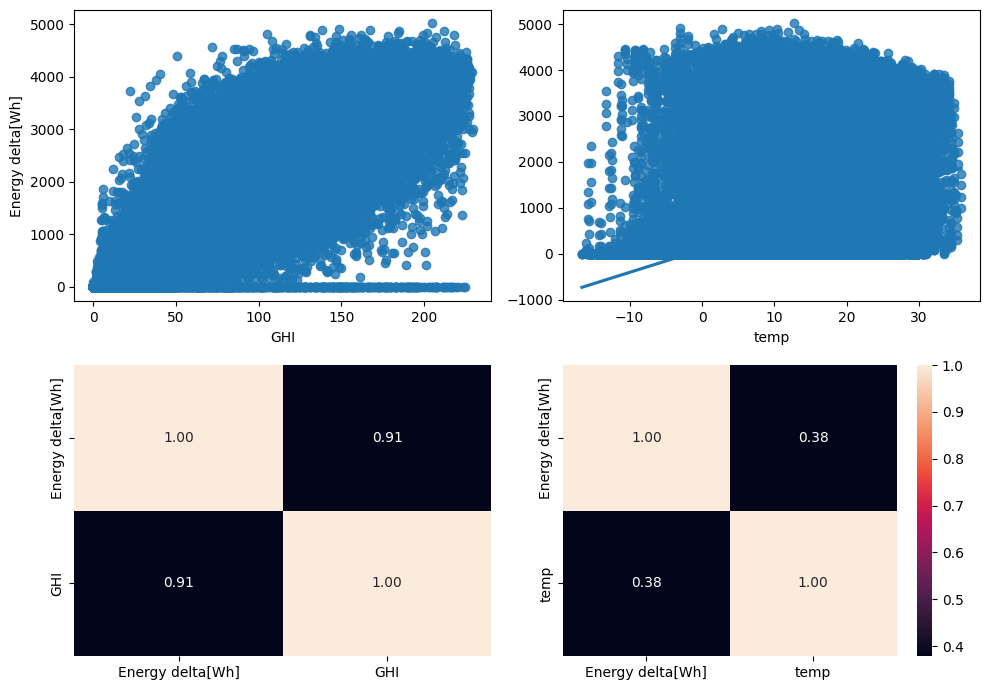

In [26]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
# Create a multiple scatter plot

sns.regplot(ax = axis[0, 0], data = total_data, x = "GHI", y = "Energy delta[Wh]")
sns.heatmap(total_data[["Energy delta[Wh]", "GHI"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "temp", y = "Energy delta[Wh]").set(ylabel=None)
sns.heatmap(total_data[["Energy delta[Wh]", "temp"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**Existe una relación muy directa entre la irradiación global horizontal y el consumo de energía. Así también, se puede observar que la relación entre la energía de consumo y la temperatura, tienen una relacion directa (pero no tan fuerte) debido a que la temperatura tiene importancia sobre la predictora pero no se ve tan reflejada como la anterior.**

*There is a very direct relationship between global horizontal irradiation and energy consumption. Similarly, it can be observed that the relationship between energy consumption and temperature is direct (but not as strong) because temperature is important for the predictor but is not as clearly reflected as the former.*

- **Relación entre `Energy Delta [Wh]` / `month` y `Energy Delta [Wh]` / `hour`**

- *Relationship between `Energy Delta [Wh]` / `month` and `Energy Delta [Wh]`/ `hour`*

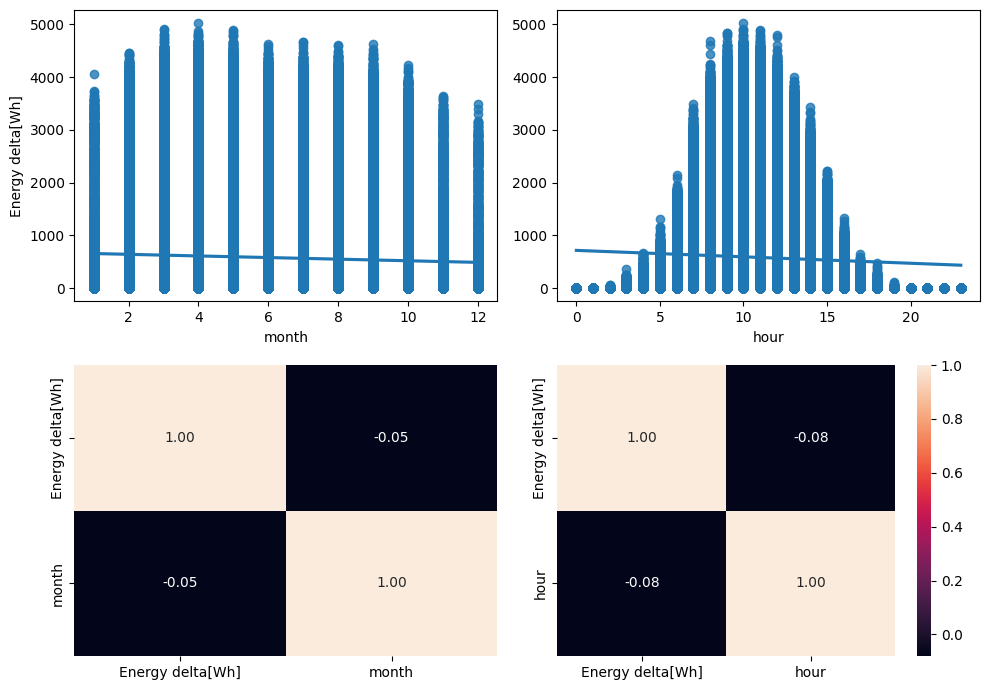

In [27]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
# Create a multiple scatter plot

sns.regplot(ax = axis[0, 0], data = total_data_timediv, x = "month", y = "Energy delta[Wh]")
sns.heatmap(total_data_timediv[["Energy delta[Wh]", "month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_timediv, x = "hour", y = "Energy delta[Wh]").set(ylabel=None)
sns.heatmap(total_data_timediv[["Energy delta[Wh]", "hour"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**En la relacion con los meses se observa una forma de manera ascendente desde enero hasta abril que es donde encontramos el pico mas alto, y una forma descendente desde mayo hasta febrero. En comparación con las horas, se ve que se recoge más energía en las horas de sol, que se ubican a partir de las 7 teniendo su pico a las 10 de la mañana y decreciendo a lo largo del día.**

*In the relationship with the months, an ascending pattern is observed from January to April, where we find the highest peak, and a descending pattern from May to February. In comparison with the hours, it is seen that more energy is collected during the sunlight hours, starting from 7 AM with a peak at 10 AM and decreasing throughout the day.*

- **Relación entre `Energy Delta [Wh]` / `pressure` y `Energy Delta [Wh]` / `humidity`**

- **Relationship between `Energy Delta [Wh]` / `pressure` and `Energy Delta [Wh]` / `humidity`**

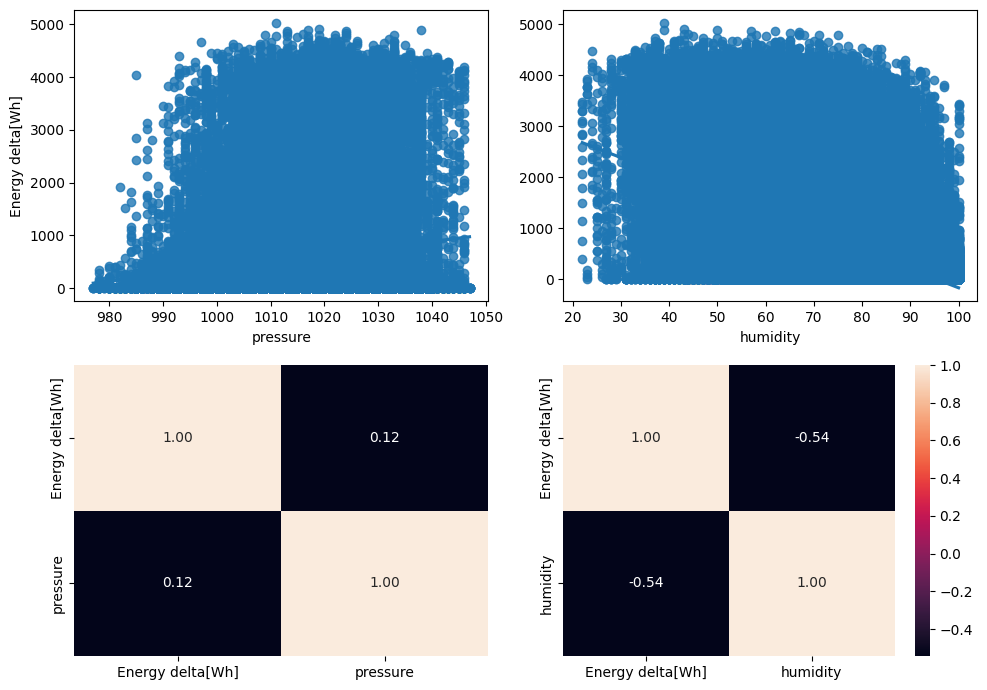

In [28]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
# Create a multiple scatter plot

sns.regplot(ax = axis[0, 0], data = total_data, x = "pressure", y = "Energy delta[Wh]")
sns.heatmap(total_data[["Energy delta[Wh]", "pressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "humidity", y = "Energy delta[Wh]").set(ylabel=None)
sns.heatmap(total_data[["Energy delta[Wh]", "humidity"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**La correlación entre la presion y la energía es muy débil, lo que sugiere que la presión no tiene un impacto significativo en el cambio de energía. Entre la humedad y la Energía hay una correlación negativa moderada, sugiriendo que la humedad influye más notablemente en la energía, con un aumento en la humedad generalmente asociado a una disminución en la energía.**

*The correlation between pressure and energy is very weak, suggesting that pressure does not have a significant impact on the energy change. Between humidity and Energy, there is a moderate negative correlation, suggesting that humidity influences energy more noticeably, with an increase in humidity generally associated with a decrease in energy.*

- **Relacion entre `Energy Delta [Wh]` / `wind_speed` y `Energy Delta [Wh]` / `rain_1h`**

- *Relationship between `Energy Delta [Wh]` / `wind_speed and Energy Delta [Wh]` / `rain_1h`*

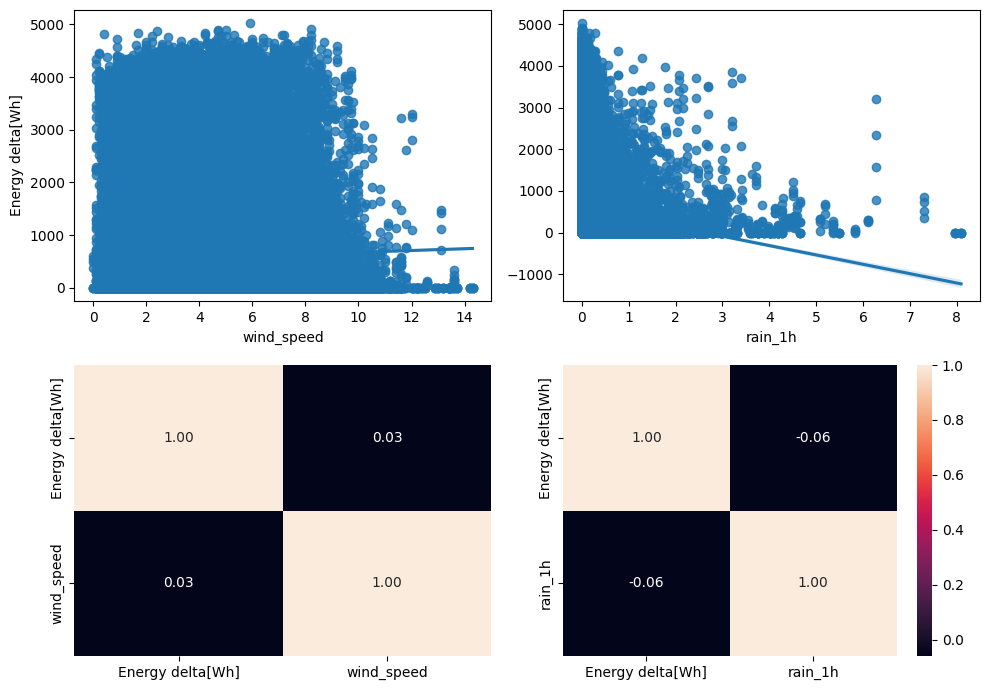

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
# Create a multiple scatter plot

sns.regplot(ax = axis[0, 0], data = total_data, x = "wind_speed", y = "Energy delta[Wh]")
sns.heatmap(total_data[["Energy delta[Wh]", "wind_speed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "rain_1h", y = "Energy delta[Wh]").set(ylabel=None)
sns.heatmap(total_data[["Energy delta[Wh]", "rain_1h"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**La velocidad del viento y la energía tienen una correlación que es muy débil, sugiriendo que la velocidad del viento no tiene un impacto significativo en la energía. Con la lluvia pasa exactamente igual, aunque la correlación es débil, hay una tendencia negativa observable, indicando que un aumento en la lluvia podría estar asociado con una disminución en la energía.**

*Wind speed and energy have a correlation that is very weak, suggesting that wind speed does not have a significant impact on energy. The same happens with rain; although the correlation is weak, there is an observable negative trend, indicating that an increase in rain could be associated with a decrease in energy.*

- **Relacion entre `Energy Delta [Wh]` / `snow_1h` y `Energy Delta [Wh]` / `clouds_all`**

- *Relationship between `Energy Delta [Wh`] / `snow_1h` and `Energy Delta [Wh]` / `clouds_all`*

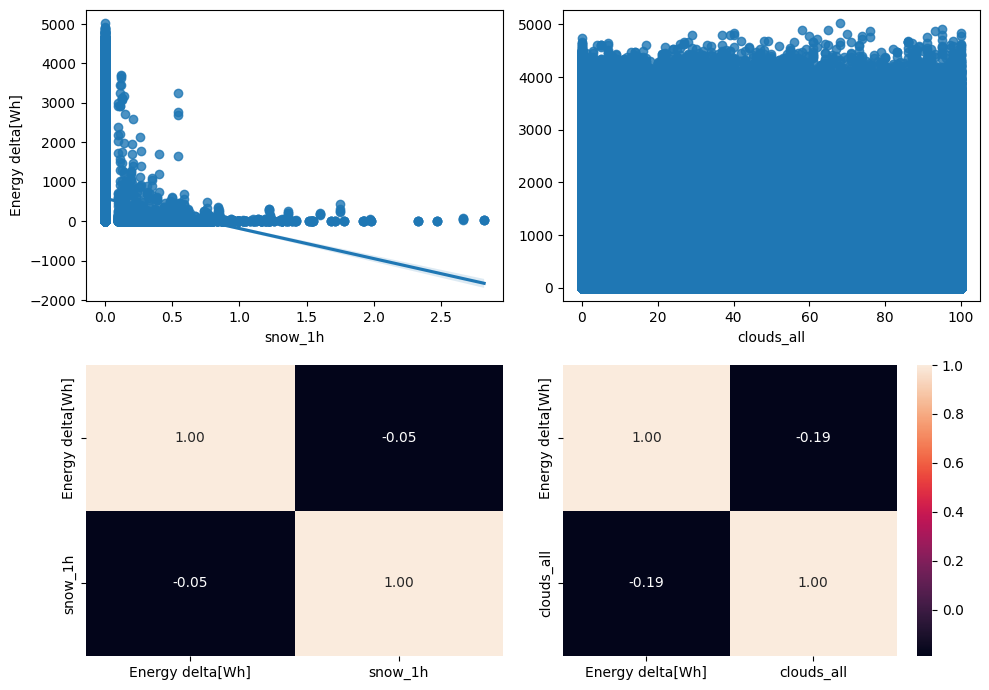

In [30]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
# Create a multiple scatter plot

sns.regplot(ax = axis[0, 0], data = total_data, x = "snow_1h", y = "Energy delta[Wh]")
sns.heatmap(total_data[["Energy delta[Wh]", "snow_1h"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "clouds_all", y = "Energy delta[Wh]").set(ylabel=None)
sns.heatmap(total_data[["Energy delta[Wh]", "clouds_all"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**Entre la nieve en 1 Hora y la energía, la correlación es muy débil, sugiriendo que la cantidad de nieve tiene un impacto mínimo en la energía. En cuanto a la nubosidad y la energía, hay una correlación negativa débil, indicando que un aumento en la nubosidad podría estar asociado con una ligera disminución de la energía, aunque la relación no es fuerte.**

*Between snow in 1 hour and energy, the correlation is very weak, suggesting that the amount of snow has a minimal impact on energy. Regarding cloudiness and energy, there is a weak negative correlation, indicating that an increase in cloudiness could be associated with a slight decrease in energy, although the relationship is not strong.*

- **Relacion entre `Energy Delta [Wh]` / `sunlightTime` y `Energy Delta [Wh]` / `dayLength`**

- *Relationship between `Energy Delta [Wh]` / `sunlightTime` and `Energy Delta [Wh]` / `dayLength`*

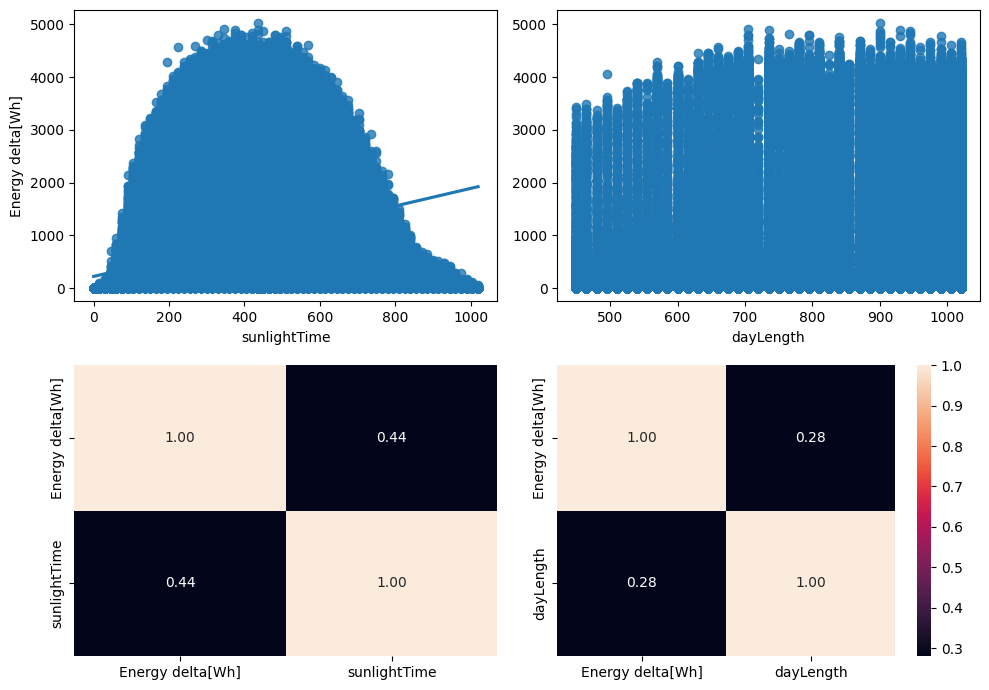

In [31]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
# Create a multiple scatter plot

sns.regplot(ax = axis[0, 0], data = total_data, x = "sunlightTime", y = "Energy delta[Wh]")
sns.heatmap(total_data[["Energy delta[Wh]", "sunlightTime"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "dayLength", y = "Energy delta[Wh]").set(ylabel=None)
sns.heatmap(total_data[["Energy delta[Wh]", "dayLength"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
# Adjust the layout

plt.tight_layout()

# Mostrar el plot
# Show the plot

plt.show()

**Se observa una relacion considerable entre la duración de tiempo de sol y de energía ya que a mas horas de sol mayor energía se recoge. En cambio se observa una relacion menos fuerte con la energía y lo largo del día ya que hay franjas horarias en las que se recoge más y en otras disminuye.**

*A considerable relationship is observed between the duration of sunlight and energy, as more sunlight hours result in more energy collected. However, a less strong relationship is observed between energy and the length of the day, as there are time intervals where more energy is collected and others where it decreases.*

### <u>Análisis Categórico-Categórico<u>

### <u>*Categorical-Categorical Analysis*<u>

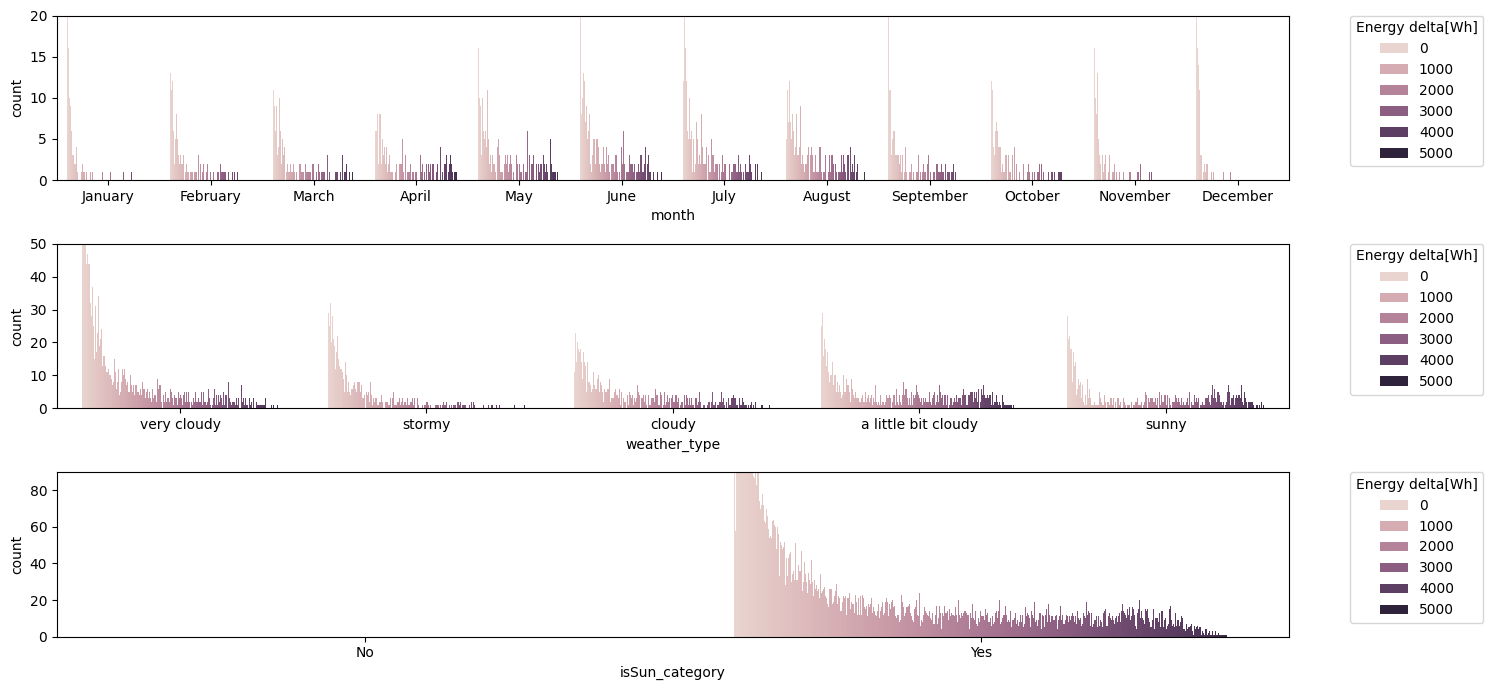

In [32]:
# Se establece un límite para el eje y, de manera que sea posible visualizar correctamente los gráficos
# A limit is set for the y-axis, so that it's possible to visualize the graphs correctly

fig, axis = plt.subplots(3, figsize=(15, 7))

# Primer gráfico
# First Graph
sns.countplot(ax=axis[0], data=total_data, x="month", hue="Energy delta[Wh]").set(ylim=(0, 20))
legend_0 = axis[0].legend(title="Energy delta[Wh]", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Segundo gráfico
# Second Graph
sns.countplot(ax=axis[1], data=total_data, x="weather_type", hue="Energy delta[Wh]").set(ylim=(0, 50))
legend_1 = axis[1].legend(title="Energy delta[Wh]", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Tercer gráfico
# Third Graph
sns.countplot(ax=axis[2], data=total_data, x="isSun_category", hue="Energy delta[Wh]").set(ylim=(0, 90))
legend_2 = axis[2].legend(title="Energy delta[Wh]", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

* **`month`-`Energy delta[Wh]`: los registros más altos se encuentran en los meses de abril, mayo, junio, julio, agosto y septiembre. Resalta en todos los meses que los registros más numerosos son los cercanos a 0, influenciado claramente por los registros nocturnos.**

* *`month`-`Energy delta [Wh]`: The highest records are found in the months of April, May, June, July, August, and September. It stands out in all months that the most numerous records are those close to 0, clearly influenced by the nighttime records.*

* **`weather_type`-`Energy delta[Wh]`: se puede observar que los tipos de climas más asociados a nubosidad o lluvias tienen mayor cantidad de datos asociados a registros bajos de Wh proveniente de la variable `Energy Delta[Wh]`.**



* isSun_category-Energy delta[Wh]: como era de esperar todos los datos asociados de la variable "Energy delta[Wh]" se encuentran en la vategoría "Yes" de la variable "isSun_category". Esto es debido que los datos de "Energy delta[Wh]" solo tienen lugar cuando hay presencia solar.

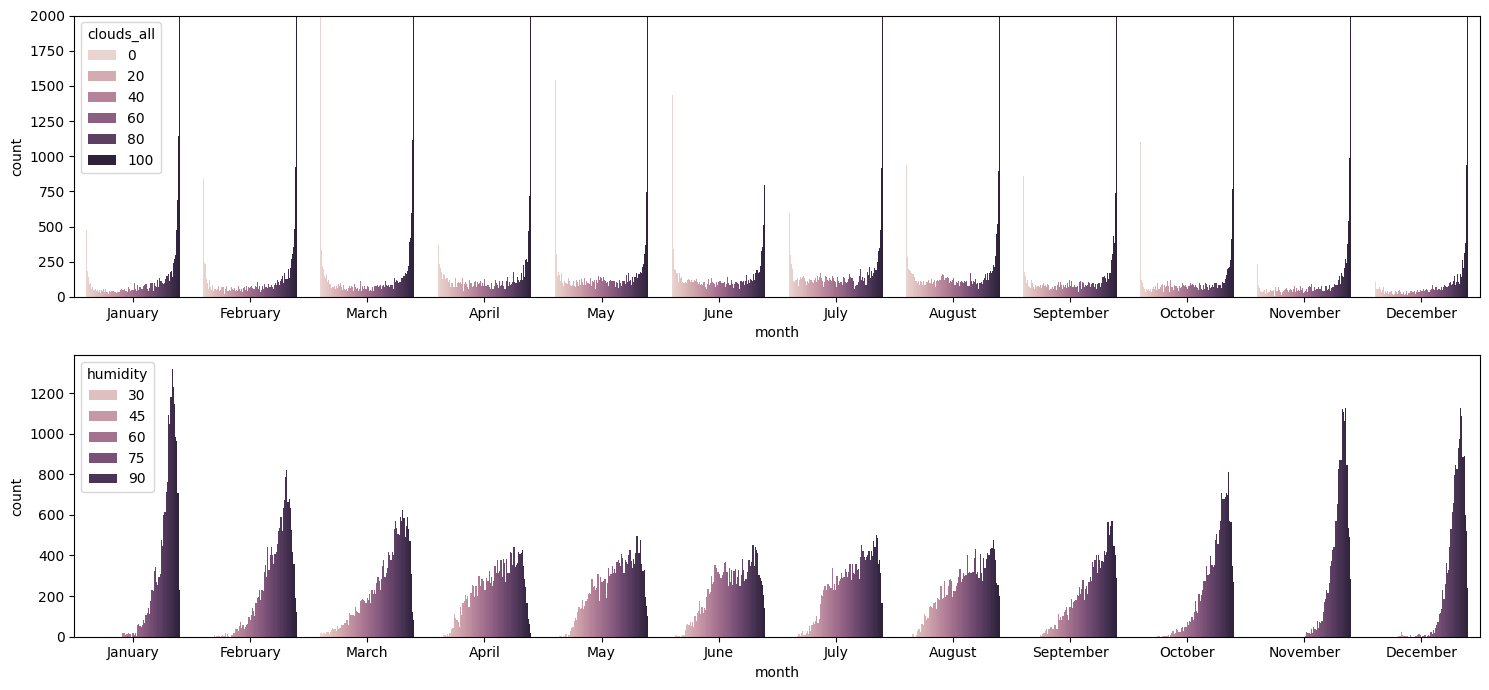

In [33]:
fig, axis = plt.subplots(2, figsize=(15, 7))


sns.countplot(ax = axis[0], data=total_data, x="month", hue="clouds_all").set(ylim=(0, 2000))
sns.countplot(ax = axis[1], data = total_data, x = "month", hue = "humidity")

plt.tight_layout()
plt.show()


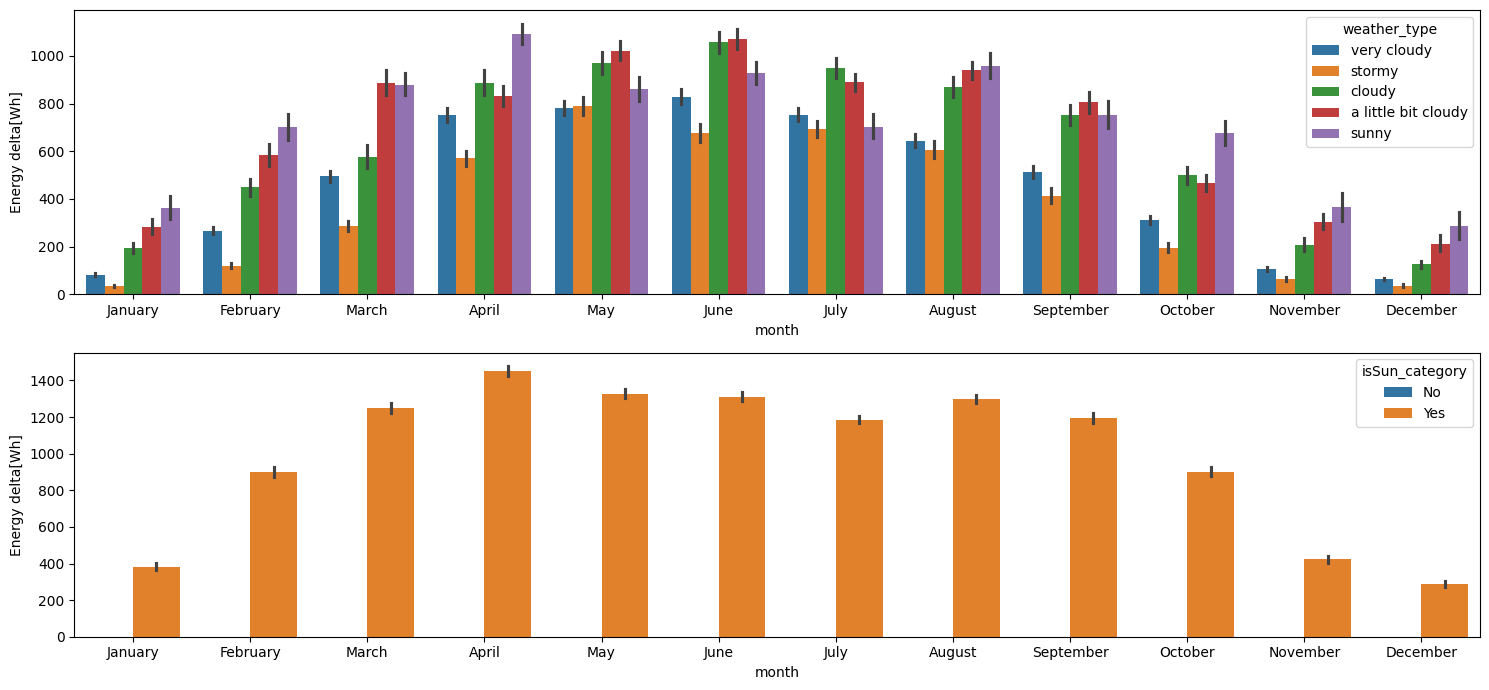

In [34]:
fig, axis = plt.subplots(2, figsize=(15, 7))

sns.barplot(ax = axis[0], data = total_data, x = "month", y = "Energy delta[Wh]", hue = "weather_type")
sns.barplot(ax = axis[1], data = total_data, x = "month", y = "Energy delta[Wh]", hue = "isSun_category")

plt.tight_layout()

plt.show()

**En estos gráficos observamos cómo aún estando presentes durante todos los meses del año los 5 tipos de clima, en los meses de abril, mayo, junio, julio, agosto y septiembre son dónde más hay registros de datos altos de `Energy delta[Wh]`.**

*In these graphs, we observe that even though all 5 weather types are present throughout all months of the year, it is in the months of April, May, June, July, August, and September where there are the highest records of `Energy delta[Wh]`.*

### <u>**Análisis Numérico-Categórico**<u>

### <u>*Numerical-Categorical Analysis*<u>

#### **<u>Análisis de correlaciones<u>**

#### *<u>Correlation Analysis<u>*

**El análisis multivariante también permite combinar la clase con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.**

*Multivariate analysis also allows combining the class with multiple predictors at the same time to enrich the analysis. These types of operations should be subjective and combine related features with each other.*

In [35]:
# Paso 1: Identificar columnas categóricas
# Step 1: Identify categorical columns
columnas_categoricas = total_data_timediv.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['weather_type', 'isSun_category'], dtype='object')

In [36]:
# Factorizar
# Factorize
total_data_timediv["weather_type_n"] = pd.factorize(total_data_timediv["weather_type"])[0]
total_data_timediv["isSun_n"] = pd.factorize(total_data_timediv["isSun_category"])[0]

total_data_timediv.head(10)

,year,month,day,hour,minute,Energy delta[Wh],weather_type,isSun_category,GHI,temp,...,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
0,2017,1,1,0,0,0,very cloudy,No,0.0,1.6,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
1,2017,1,1,0,15,0,very cloudy,No,0.0,1.6,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
2,2017,1,1,0,30,0,very cloudy,No,0.0,1.6,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
3,2017,1,1,0,45,0,very cloudy,No,0.0,1.6,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
4,2017,1,1,1,0,0,very cloudy,No,0.0,1.7,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
5,2017,1,1,1,15,0,very cloudy,No,0.0,1.7,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
6,2017,1,1,1,30,0,very cloudy,No,0.0,1.7,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
7,2017,1,1,1,45,0,very cloudy,No,0.0,1.7,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
8,2017,1,1,2,0,0,very cloudy,No,0.0,1.9,...,100,5.5,0.0,0.0,100,0,450,0.0,0,0
9,2017,1,1,2,15,0,very cloudy,No,0.0,1.9,...,100,5.5,0.0,0.0,100,0,450,0.0,0,0


##### <u>**Diccionario**<u>

##### <u>*Dictionary*<u>

In [39]:
total_data_timediv[["weather_type", "weather_type_n"]].to_excel("/workspaces/Proyecto-Final-JOF/data/processed/diccionario_weather_type.xlsx", index = False)
total_data_timediv[["isSun_category", "isSun_n"]].to_excel("/workspaces/Proyecto-Final-JOF/data/processed/diccionario_isSun.xlsx", index = False)

In [40]:
total_data_timediv.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'Energy delta[Wh]',
       'weather_type', 'isSun_category', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime',
       'dayLength', 'SunlightTime/daylength', 'weather_type_n', 'isSun_n'],
      dtype='object')

In [41]:
columnas=[ 'year', 'month', 'day', 'hour', 'minute',
       'Energy delta[Wh]',   'GHI', 'temp',
       'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength',
       'weather_type_n', 'isSun_n']
    # Crear DataFrame df2 con las columnas seleccionadas
    # Create DataFrame df2 with selected columns
total_final_data = total_data_timediv[columnas]

# Verificar el resultado
# Verify the result
total_final_data

,year,month,day,hour,minute,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
0,2017,1,1,0,0,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
1,2017,1,1,0,15,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
2,2017,1,1,0,30,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
3,2017,1,1,0,45,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
4,2017,1,1,1,0,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022,8,31,16,45,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,780,825,0.95,2,1
196772,2022,8,31,17,0,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,795,825,0.96,2,1
196773,2022,8,31,17,15,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,810,825,0.98,2,1
196774,2022,8,31,17,30,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,825,825,1.00,2,1


In [44]:
total_final_data.to_csv("/workspaces/Proyecto-Final-JOF/data/processed/total_final_data.csv")

##### <u> Todas las columnas son numericas<u>

##### <u> All columns are numerical<u>

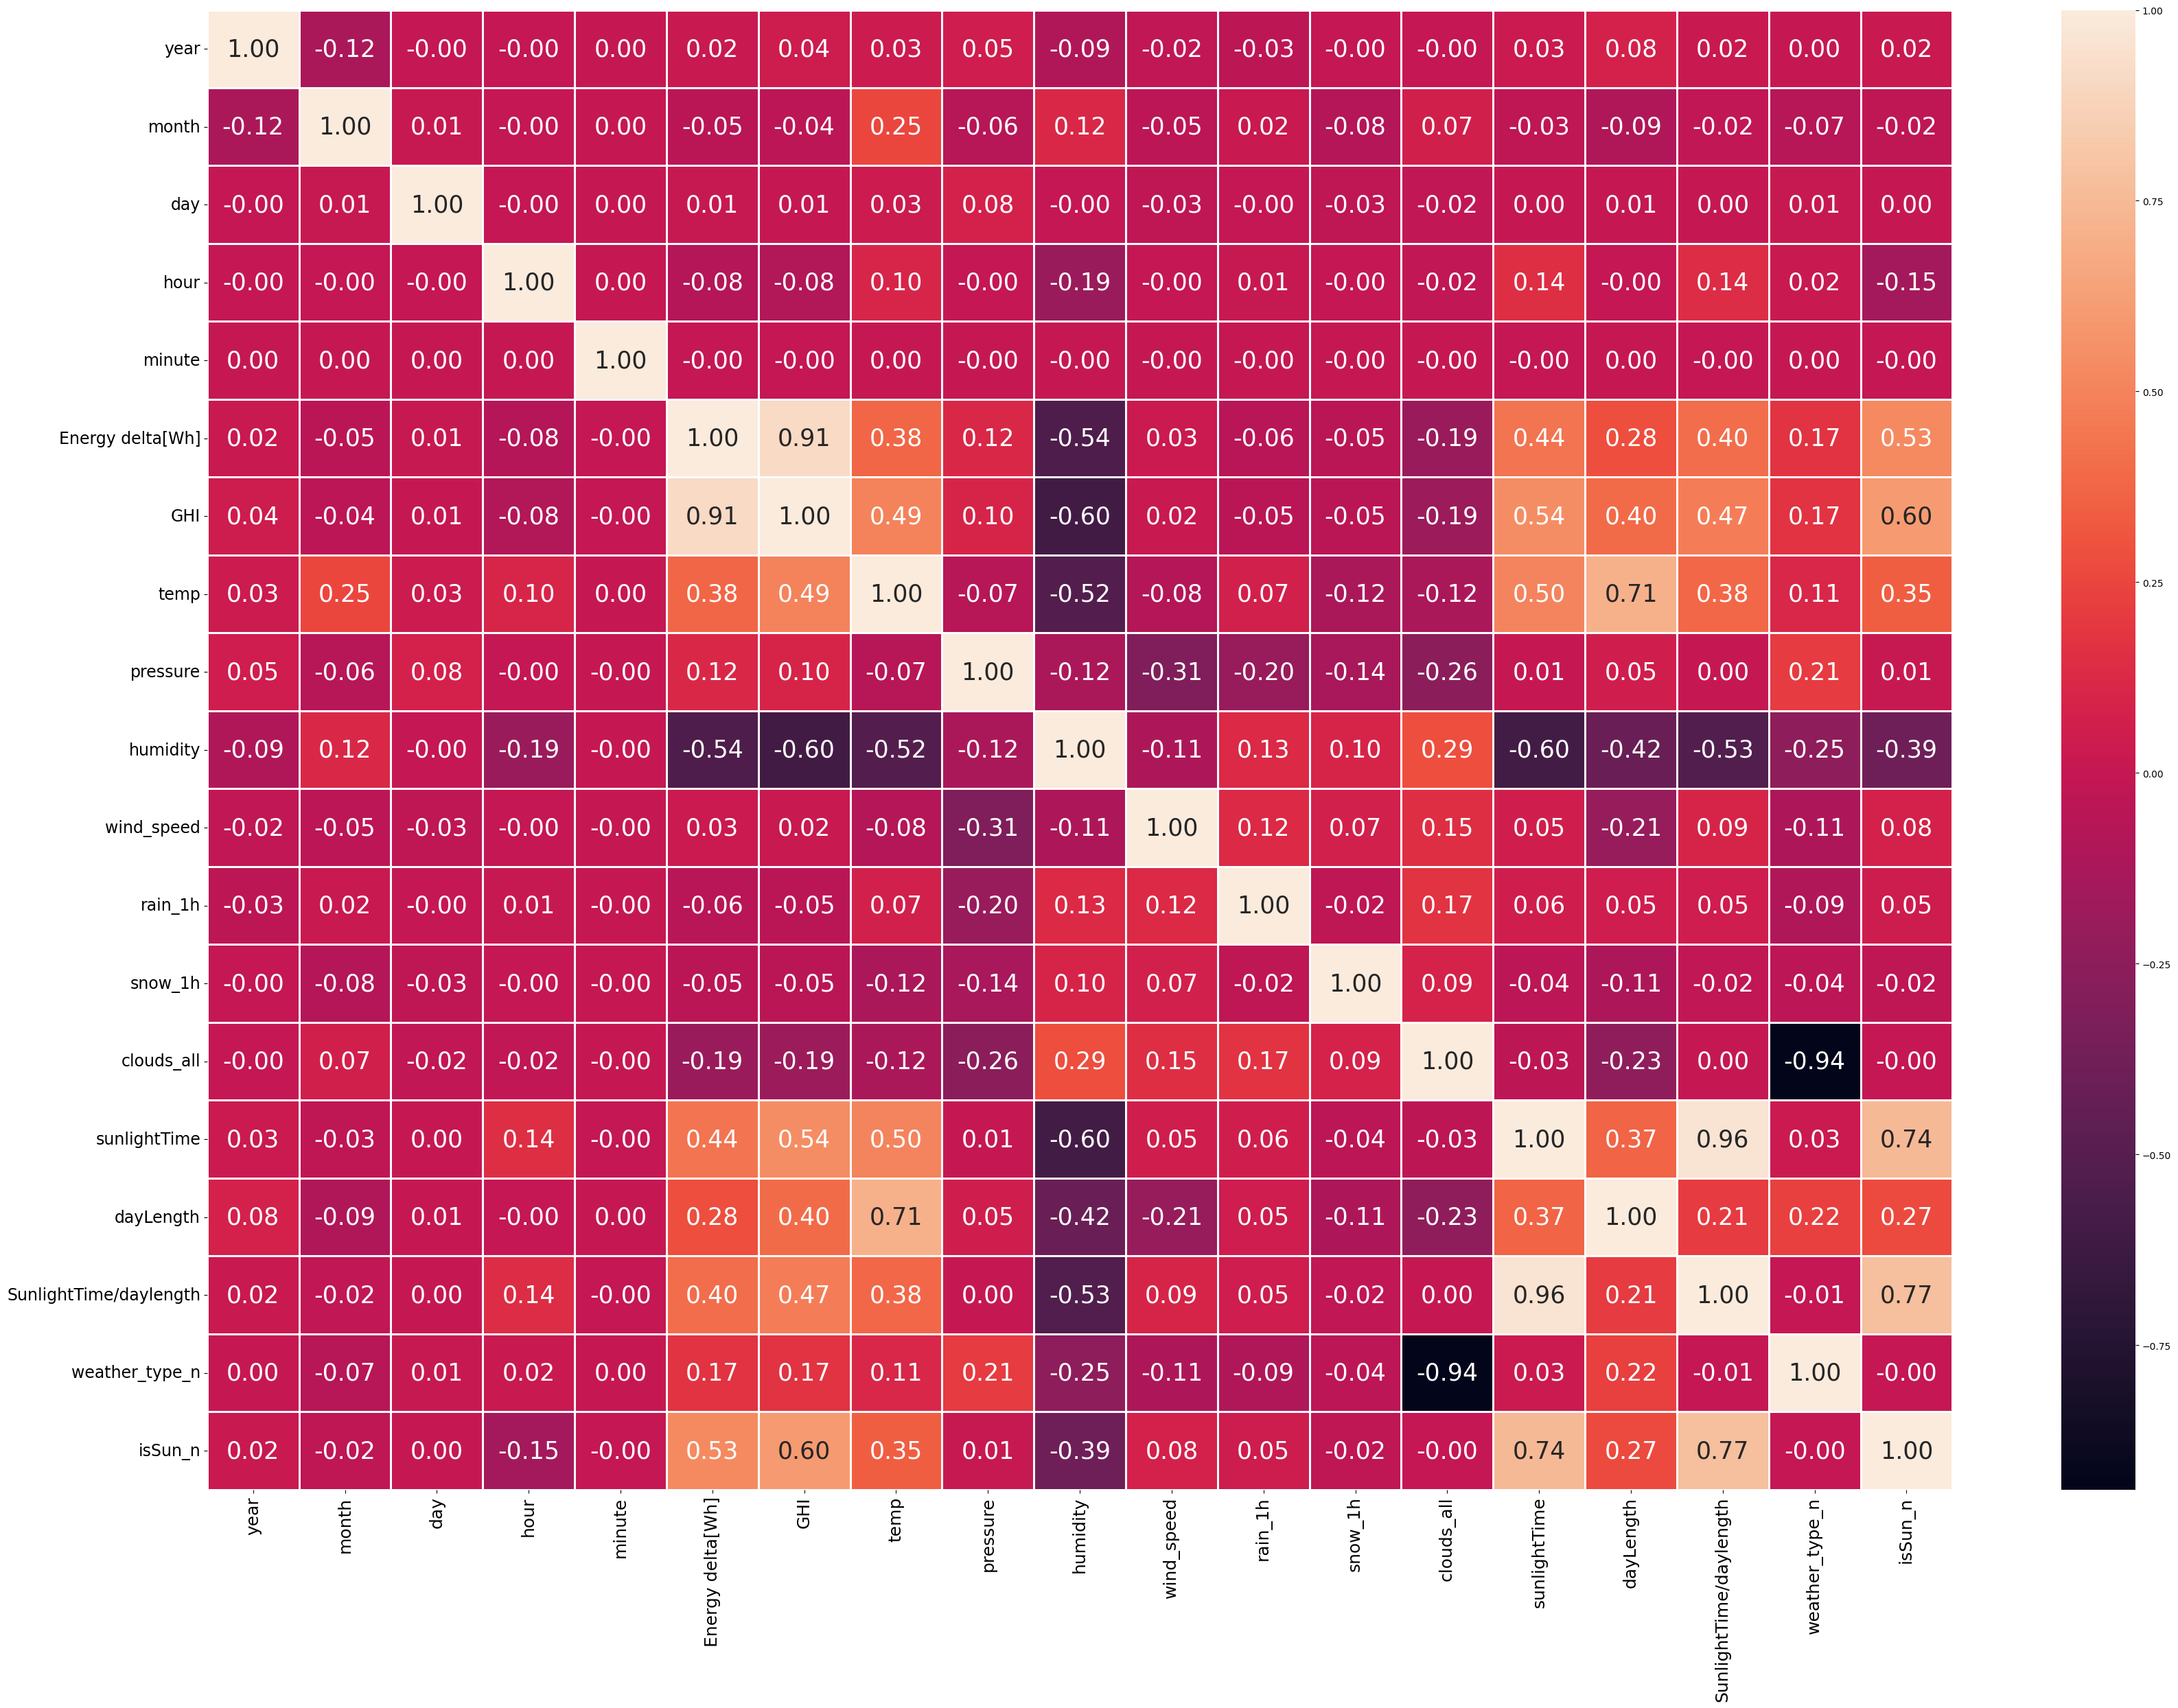

In [45]:
# correlacion
# correlation

import matplotlib.pyplot as plt 
correlation_matrix = total_final_data.corr()

# Visualizar la matriz de correlación usando un heatmap
# Visualize the correlation matrix using a heatmap

fig, axis = plt.subplots(figsize=(35,25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linecolor='white', linewidths=1, annot_kws={"size": 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.tight_layout()
plt.show()

##### **Relaciones negativas fuertes**
- **`Wheather_type`-`clouds_all`(-0.94)**
    : Ya que los tipos de clima más despejados y calurosos se corresponden con valores numéricos más bajos, se comprende la fuerte relación negativa.

- **`Energy delta`-`humidity`(-0.54)**
    : A medida que la humedad aumenta, la variabilidad en la energía (energía delta) tiende a disminuir.
    En condiciones de alta humedad, es probable que haya más nubosidad y menor radiación solar directa, lo que reduce la eficiencia de la producción de energía solar.
- **`GHI`-`humidity`(-0.60)**
    : A medida que la humedad aumenta, la irradiancia horizontal global (cantidad de radiación solar recibida en una superficie horizontal) disminuye.
    Alta humedad está asociada con mayor nubosidad. Las nubes y el vapor de agua en la atmósfera dispersan y absorben la luz solar, reduciendo la cantidad de radiación solar que llega a la superficie terrestre.
- **`Temp`-`humidity`(-0.52)**
    : A medida que la humedad aumenta, la temperatura tiende a disminuir.**
    En climas húmedos, la evaporación y la presencia de nubes pueden tener un efecto refrescante durante el día.

- **`SunlightTime/daylenght`-`humidity`(-0.53)**
- **`SunlightTime-humidity`(-0.60)**
- **`IsSun_n-humidity`(-0.30)**
    : A medida que la cantidad de tiempo con luz solar directa aumenta, la humedad tiende a disminuir.
    Mayor cantidad de luz solar directa está asociada con condiciones menos nubladas y más secas, lo que reduce la humedad relativa.

- **`Day_Lenghht`-`humidity`(-0.42)**
   : A medida que la longitud del día aumenta, la humedad tiende a disminuir.
   En épocas del año con días más largos (como el verano), las temperaturas suelen ser más altas, lo que reduce la humedad relativa debido a la mayor capacidad del aire caliente para retener vapor agua.

- **`Where_type`-`humidity`(-0.25)**
    : Una correlación de -0.25 entre Weather_type y la humedad indica una relación negativa débil. Esto significa que ciertos tipos de lugares tienden a tener diferentes niveles de humedad, y a medida que cambiamos de un tipo de lugar a otro, la humedad puede variar de manera sistemática, aunque la relación no es muy fuerte.
   
 - **`Hour`-`humidity`(-0.19)** 
    : Una correlación de -0.19 entre la hora y la humedad indica una relación negativa débil. Esto significa que a medida que avanza el día, la humedad tiende a disminuir ligeramente, pero no de manera muy fuerte


*Strong Negative Relationships*

*`Wheather_type`-`clouds_all`(-0.94)*
: *Since clearer and hotter weather types correspond to lower numerical values, the strong negative relationship is understood.*

*`Energy delta`-`humidity`*(-0.54)
: *As humidity increases, the variability in energy (energy delta) tends to decrease.*
*In high humidity conditions, there is likely to be more cloud cover and less direct solar radiation, reducing the efficiency of solar energy production.*

*`GHI`-`humidity`*(-0.60)
: *As humidity increases, global horizontal irradiance (amount of solar radiation received on a horizontal surface) decreases.*
*High humidity is associated with greater cloud cover. Clouds and water vapor in the atmosphere scatter and absorb sunlight, reducing the amount of solar radiation reaching the Earth's surface.*

*`Temp`-`humidity`*(-0.52)*
: *As humidity increases, temperature tends to decrease.*
*In humid climates, evaporation and cloud presence can have a cooling effect during the day.*

*`SunlightTime/daylength`-`humidity`*(-0.53)

*`SunlightTime`-`humidity`*(-0.60)

*`IsSun_n`-`humidity`*(-0.30)
: *As the amount of time with direct sunlight increases, humidity tends to decrease.*
*More direct sunlight is associated with less cloudy and drier conditions, reducing relative humidity.*

*`Day_Length`-`humidity`*(-0.42)
: *As day length increases, humidity tends to decrease.*
*In times of the year with longer days (like summer), temperatures are usually higher, reducing relative humidity due to the greater capacity of warm air to hold water vapor.*

*`Weather_type`-`humidity`*(-0.25)
: *A correlation of -0.25 between Weather_type and humidity indicates a weak negative relationship. This means that certain types of places tend to have different humidity levels, and as we move from one type of place to another, humidity can vary systematically, though the relationship is not very strong.*

*`Hour`-`humidity`*(-0.19)
: *A correlation of -0.19 between hour and humidity indicates a weak negative relationship. This means that as the day progresses, humidity tends to decrease slightly, but not very strongly.*


Las relaciones indican que a medida que la humedad aumenta, disminuyen parámetros como la variabilidad energética, irradiación solar, temperatura y tiempo de luz solar directa. La humedad está asociada con condiciones más nubladas, menos eficientes para la energía solar.

**Relaciones positivas fuertes**
- **`Ghi-Energy`(0,91)**
    : A mayor irradiancia horizontal global, mayor producción de energía.
- **`Temp-Energy`(0,38)**
    : A mayor temperatura, mayor producción de energía.
- **`Wheather_type-Energy`(0,38)**
    : El tipo de lugar influye en la disponibilidad de radiación solar y condiciones ambientales. Por ejemplo, áreas desérticas o zonas con alta exposición solar generalmente producen más energía solar.

- **`DayLenght-Energy`(0,28)**
    : A mayor longitud del día, mayor producción de energía.
- **`Sunlight-Energy`(0,44)**
    : A mayor cantidad de luz solar, mayor producción de energía
- **`SunLight/daylenght-Energy`(0,40)**
    : A mayor combinación de luz solar y duración del día, mayor producción de energía.
- **`isSun-Energy`(0,53)**
    : La presencia de sol aumenta la producción de energía. 

- **`Month-temp(0.25)`**: Indica una relación positiva débil. La temperatura tiende a aumentar o disminuir con el cambio de mes, pero hay una gran variabilidad debido a otros factores.

**Las relaciones positivas fuertes indican que la producción de energía está fuertemente influenciada por la irradiancia solar, la temperatura, el tipo de clima, la duración del día y la cantidad de luz solar. Estos factores son críticos para la eficiencia y la cantidad de energía generada, especialmente en sistemas solares fotovoltaicos. En general, las condiciones que aumentan la disponibilidad de radiación solar y las horas de luz del día tienden a aumentar significativamente la producción de energía.**

*Strong positive relationships indicate that energy production is strongly influenced by solar irradiance, temperature, weather type, day length, and amount of sunlight. These factors are critical for the efficiency and amount of energy generated, especially in photovoltaic solar systems. In general, conditions that increase the availability of solar radiation and daylight hours tend to significantly boost energy production.*

 **La irradiancia horizontal global ess una medida de la cantidad de radiación solar que llega a la superficie de la Tierra horizontalmente en un área determinada durante un período específico de tiempo. La unidad de medida típica para GHI es Watts por metro cuadrado (W/m²).**

 *Global Horizontal Irradiance (GHI) is a measure of the amount of solar radiation reaching the Earth's surface horizontally in a given area over a specific period. The typical unit of measurement for GHI is watts per square meter (W/m²).*

**Relaciones Positivas fuertes en `GHI`**

- **`Ghi-temp`(0,48)**
   Más irradiancia solar significa más energía solar que calienta la superficie terrestre, elevando la temperatura del aire.
- **`Ghi-sunlight`(0,54)**
   A mayor irradiancia horizontal global, mayor cantidad de luz solar directa.
- **`Ghi-daylenght`(0,40)**
   Días más largos permiten más horas de exposición solar, incrementando la irradiancia total recibida.
- **`Ghi-sunlight/daylenght`(0,47)**
   A mayor combinación de luz solar y duración del día, mayor irradiancia horizontal global.
- **`Ghi-isSun`(0,60)**
   Alta irradiancia solar está asociada con condiciones despejadas y soleadas, aumentando la cantidad de días con sol directo.

*Strong Positive Relationships in `GHI`*

- *`GHI-temp` (0.48)*
   *More solar irradiance means more solar energy heating the Earth's surface, raising the air temperature.*
- *`GHI-sunlight` (0.54)*
   *Higher global horizontal irradiance corresponds to more direct sunlight.*
- *`GHI-daylength` (0.40)*
   *Longer days allow for more hours of solar exposure, increasing the total irradiance received.*
- *`GHI-sunlight/daylength` (0.47)*
   *The greater the combination of sunlight and day length, the higher the global horizontal irradiance.*
- *`GHI-isSun` (0.60)*
   *High solar irradiance is associated with clear and sunny conditions, increasing the number of days with direct sunlight.*   

**Las relaciones positivas indican que la irradiancia horizontal global (`GHI`) está fuertemente influenciada por la temperatura, la cantidad de luz solar, la longitud del día, y la frecuencia de días soleados. Estos factores se complementan, ya que más horas de luz solar y días despejados aumentan la energía solar recibida, calentando la atmósfera y extendiendo la duración de la irradiancia solar**

*Positive relationships indicate that global horizontal irradiance (`GHI`) is strongly influenced by temperature, the amount of sunlight, day length, and the frequency of sunny days. These factors are complementary, as more hours of sunlight and clear days increase the solar energy received, warming the atmosphere and extending the duration of solar irradiance.*

**Relaciones fuertes con `Clouds_all`**

- **`Clouds_all-whether_type`(-0,94)**
   Diferentes tipos de clima (por ejemplo, soleado, nublado, tormentoso) están directamente influenciados por la cantidad de cobertura nubosa
- **`Clouds_all-pressure`(-0,26)**
   Las áreas de baja presión suelen estar asociadas con mayor cobertura nubosa y condiciones meteorológicas inestables, como tormentas y frentes fríos
- **`Clouds_all-humididy`(0,29)**
   Las nubes son formaciones de vapor de agua condensado, por lo que una mayor cobertura nubosa indica más humedad en la atmósfera.
- **`Clouds_all-wind_speed`(0,15)**
   A mayor cobertura nubosa, mayor velocidad del viento..
- **`Clouds_all-irain-1h`(0,17)**
   A mayor cobertura nubosa, mayor cantidad de lluvia en una hora.

   *Strong Relationships with `Clouds_all`*

- *`Clouds_all-weather_type` (-0.94)*
   *Different weather types (e.g., sunny, cloudy, stormy) are directly influenced by the amount of cloud cover.*
- *`Clouds_all-pressure` (-0.26)*
   *Low-pressure areas are often associated with greater cloud cover and unstable weather conditions, such as storms and cold fronts.*
- *`Clouds_all-humidity` (0.29)*
   *Clouds are formations of condensed water vapor, so greater cloud cover indicates more humidity in the atmosphere.*
- *`Clouds_all-wind_speed` (0.15)*
   *Higher cloud cover is associated with higher wind speeds.*
- *`Clouds_all-rain_1h` (0.17)*
   *Greater cloud cover correlates with more rainfall in one hour.*

**Las relaciones indican que la cobertura nubosa está estrechamente relacionada con varios parámetros climáticos. Una alta cobertura nubosa generalmente se asocia con climas más húmedos, mayor probabilidad de lluvia, y condiciones de baja presión y vientos más fuertes. La relación negativa con el tipo de clima destaca cómo la cantidad de nubes puede definir diferentes condiciones meteorológicas, mientras que las correlaciones positivas con la humedad, la velocidad del viento y la precipitación subrayan el papel crucial de las nubes en el clima.**

*The relationships indicate that cloud cover is closely related to various climatic parameters. High cloud cover is generally associated with more humid climates, a higher likelihood of rain, low-pressure conditions, and stronger winds. The negative relationship with weather type highlights how the amount of clouds can define different weather conditions, while the positive correlations with humidity, wind speed, and precipitation emphasize the crucial role of clouds in the climate.*

**Conclusión**
Las relaciones identificadas muestran cómo la humedad, la irradiación solar, la temperatura, la duración del día, la nubosidad y las condiciones climáticas interactúan para influir en la producción de energía . La producción de energía solar está fuertemente influenciada por la cantidad de luz solar recibida y las condiciones meteorológicas, mientras que la humedad y la cobertura nubosa juegan un papel crucial en la determinación de la irradiancia solar y la temperatura. Estas relaciones subrayan la interdependencia de factores climáticos y de energía, destacando la importancia de la irradiancia solar y las condiciones climáticas para la eficiencia y la variabilidad en la producción de energía.

*Conclusion*
*The identified relationships show how humidity, solar irradiance, temperature, day length, cloud cover, and weather conditions interact to influence energy production. Solar energy production is strongly influenced by the amount of sunlight received and weather conditions, while humidity and cloud cover play a crucial role in determining solar irradiance and temperature. These relationships underscore the interdependence of climatic and energy factors, highlighting the importance of solar irradiance and weather conditions for the efficiency and variability in energy production.*

**Relacion de `humidity`, `sunlight time` y `clouds_all` para observar su comportamiento**

*Relationship between `humidity`, `sunlight time`, and `clouds_all` to Observe Their Behavior*

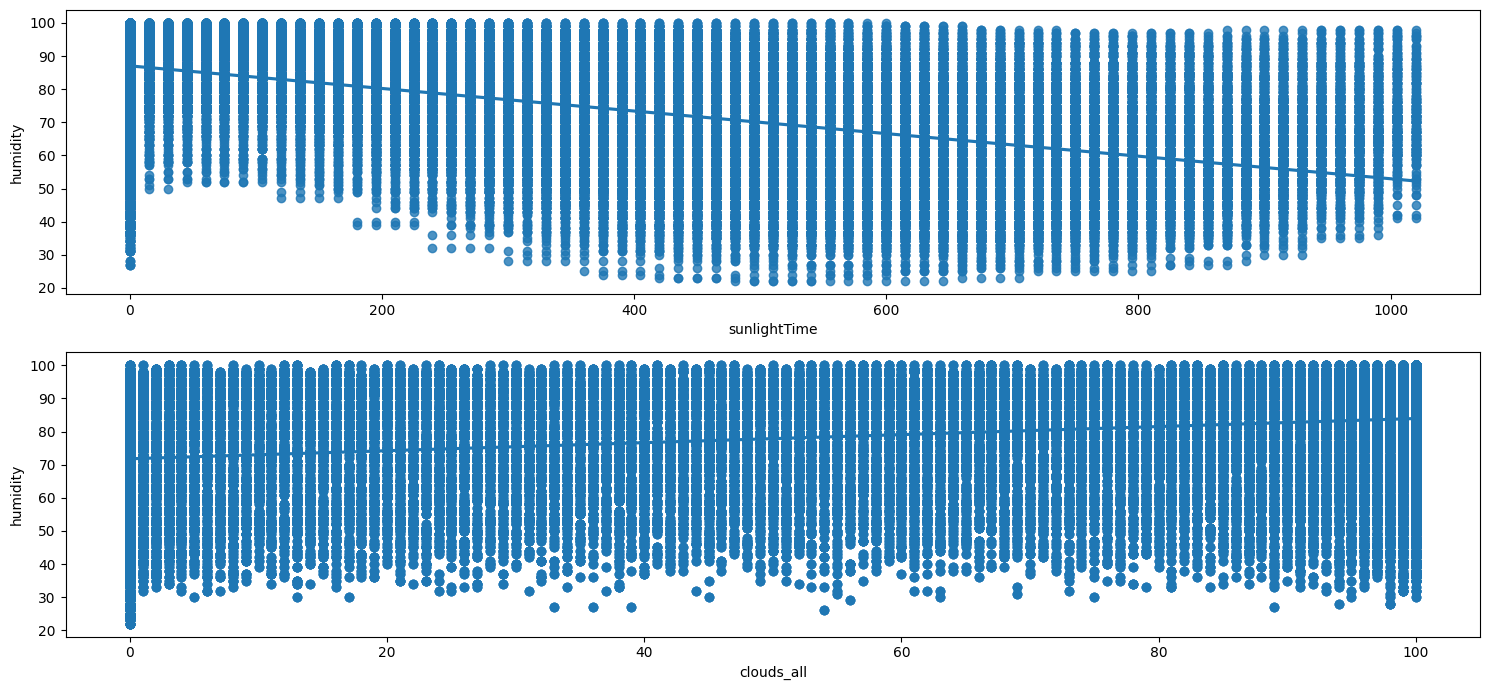

In [46]:
fig, axis = plt.subplots(2, figsize=(15, 7))

sns.regplot(ax = axis[0], data = total_data, x = "sunlightTime", y = "humidity")
sns.regplot(ax = axis[1], data = total_data, x = "clouds_all", y = "humidity")

plt.tight_layout()

plt.show()

**Tras encontrar las relaciones entre `SunLightTime`-`humidity` (-0.60) y `Clouds_all`-`humidity`(0.29), se procede a observar su comportamiento. Se concluye que a mayor duración del tiempo solar habrá menor humedad, por lo que la captación de energía por las placas solares será mayor. Se observa de igual manera que la relación positiva entre humidity y clouds_all afectaría negativamente a la captación de energía.**

*After identifying the relationships between `SunlightTime`-`humidity` (-0.60) and `Clouds_all`-`humidity` (0.29), their behavior is observed. It is concluded that with longer sunlight duration, there will be lower humidity, resulting in higher energy capture by solar panels. Similarly, it is observed that the positive relationship between humidity and `Clouds_all` would negatively impact energy capture.*

## **<span style="color:#00cc00;"><u>Feature Engineering:</u></span>**

**No es necesario que las variables predictoras estén normalizadas, ya que los bosques aleatorios, y por lo tanto los árboles de decisión, no se ven afectados por la escala de los datos debido a la forma en que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.**

*It's not necessary for the predictor variables to be normalized, as random forests, and thus decision trees, are not affected by the scale of the data due to how they work: they make decisions based on certain feature thresholds, regardless of their scale.*

In [47]:
total_final_data.describe()

,year,month,day,hour,minute,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,2019.345042,6.298329,15.744481,11.498902,22.500000,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,211.721094,748.644347,0.265187,1.576493,0.519962
std,1.636537,3.376066,8.812357,6.921887,16.770552,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,273.902186,194.870208,0.329023,1.482996,0.499603
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,8.000000,5.000000,11.250000,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,570.000000,0.000000,0.000000,0.000000
50%,2019.000000,6.000000,16.000000,11.000000,22.500000,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,30.000000,765.000000,0.050000,1.000000,1.000000
75%,2021.000000,9.000000,23.000000,17.000000,33.750000,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,390.000000,930.000000,0.530000,3.000000,1.000000
max,2022.000000,12.000000,31.000000,23.000000,45.000000,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1020.000000,1020.000000,1.000000,4.000000,1.000000


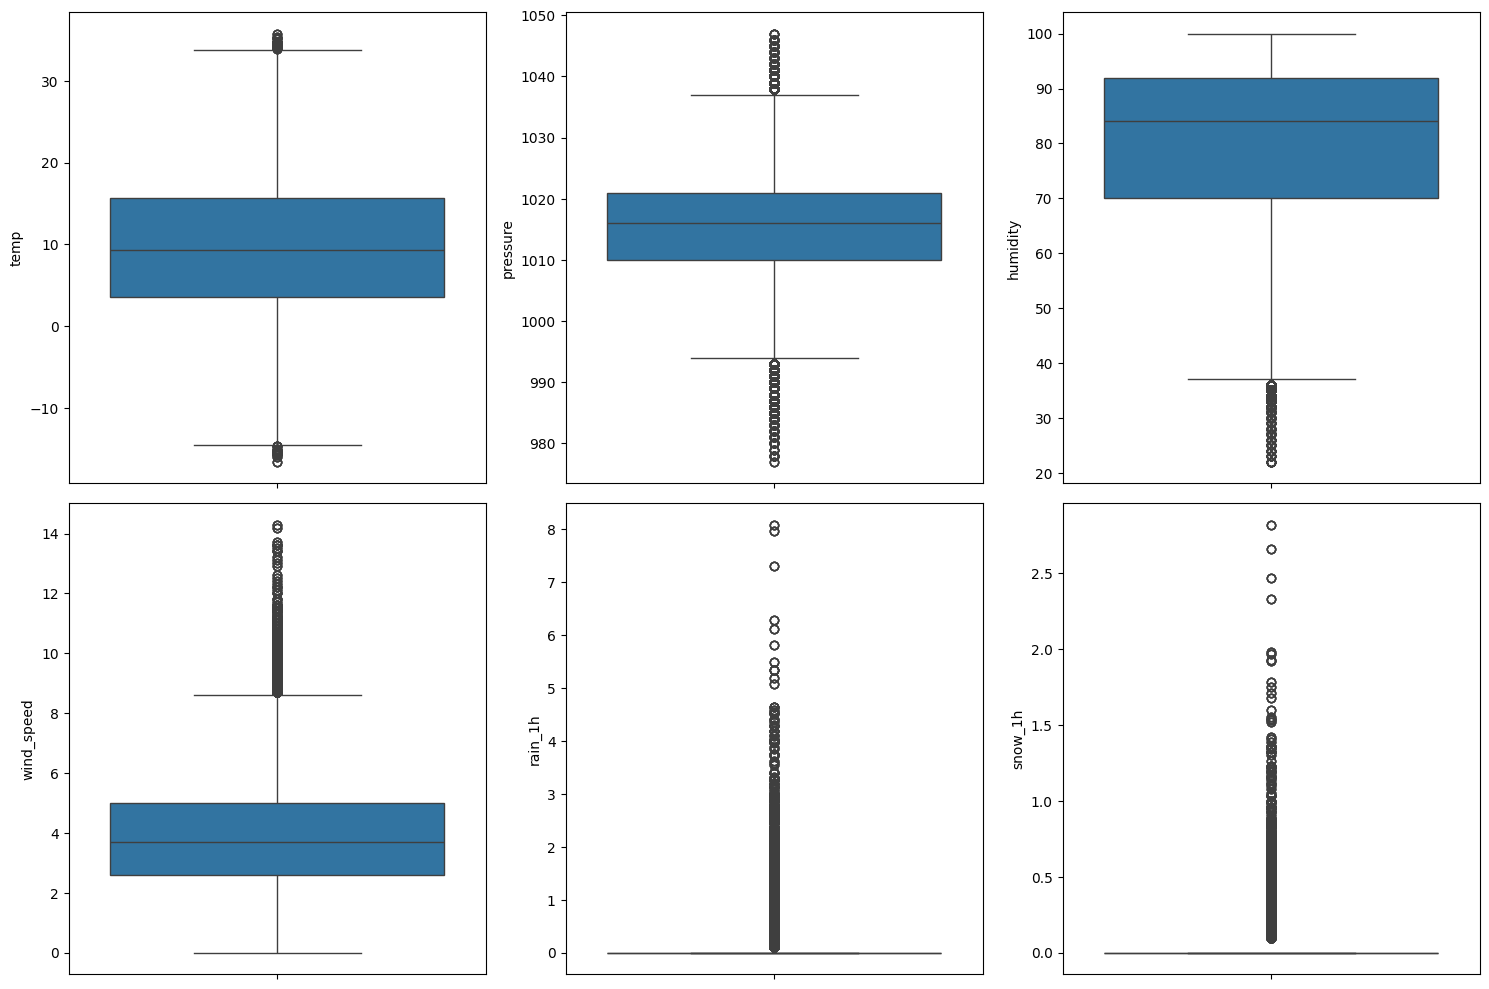

In [48]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_final_data, y = "temp")
sns.boxplot(ax = axis[0, 1], data = total_final_data, y = "pressure")
sns.boxplot(ax = axis[0, 2], data = total_final_data, y = "humidity")
sns.boxplot(ax = axis[1, 0], data = total_final_data, y = "wind_speed")
sns.boxplot(ax = axis[1, 1], data = total_final_data, y = "rain_1h")
sns.boxplot(ax = axis[1, 2], data = total_final_data, y = "snow_1h")


plt.tight_layout()

plt.show()

**No se procede a analizar/imputar los outliers de las variables `rain_1h` y `snow_1h`, ya que de lo contrario, al imputar los outliers todos los datos de ambas variables serían 0. Al igual que "GHI" y "sunlightTime", que al estar sesgados por los registros nocturnos, si los eliminamos a la hora de visualizar las variables en u diagrama de cajas, no presentan outliers en realidad.**

*There is no need to analyze/impute outliers for the variables `rain_1h` and `snow_1h`, as otherwise, by imputing the outliers, all the data for both variables would be 0. Similarly, for "GHI" and "SunlightTime", being biased by nighttime records, if we remove them when visualizing the variables in a box plot, they don't actually present outliers.*

In [49]:
# diferenciamos datasets para el tratamiento de outliers
# We differentiate datasets for outlier treatment

no_outliers_data = total_final_data.copy()

In [50]:
# Lista de columnas de interés
# List of columns of interest
columns_of_interest = ["temp", "pressure", "humidity", "wind_speed"]

# Estadísticas descriptivas para las columnas de interés
# Descriptive statistics for the columns of interest
age_stat1 = no_outliers_data[columns_of_interest].describe().loc[['25%', '75%']]

# Calcular los límites y el rango intercuartílico para cada variable
# Calculate the limits and interquartile range for each variable
for column in columns_of_interest:
    # Calcular el rango intercuartílico (IQR)
    # Calculate the interquartile range (IQR)
    age_iqr = age_stat1.loc['75%', column] - age_stat1.loc['25%', column]
    # Calcular los límites superior e inferior para la detección de valores atípicos
    # Calculate the upper and lower bounds for outlier detection
    upper_limit = age_stat1.loc['75%', column] + 1.5 * age_iqr
    lower_limit = age_stat1.loc['25%', column] - 1.5 * age_iqr

    # Imprimir los resultados
    # Print the results
    print(f"Para la variable '{column}', los límites superior e inferior para la búsqueda de valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Para la variable 'temp', los límites superior e inferior para la búsqueda de valores atípicos son 33.85 y -14.55, con un rango intercuartílico de 12.1
Para la variable 'pressure', los límites superior e inferior para la búsqueda de valores atípicos son 1037.5 y 993.5, con un rango intercuartílico de 11.0
Para la variable 'humidity', los límites superior e inferior para la búsqueda de valores atípicos son 125.0 y 37.0, con un rango intercuartílico de 22.0
Para la variable 'wind_speed', los límites superior e inferior para la búsqueda de valores atípicos son 8.6 y -1.0, con un rango intercuartílico de 2.4


In [51]:
no_outliers_data['temp'] = no_outliers_data['temp'].apply(lambda x: 4.8 if x > 33.85 or x < -14.55 else x)
no_outliers_data['pressure'] = no_outliers_data['pressure'].apply(lambda x: 1015.29 if x > 1037.5 or x < 993.5 else x)
no_outliers_data['humidity'] = no_outliers_data['humidity'].apply(lambda x: 84 if x < 37.0 else x)
no_outliers_data['wind_speed'] = no_outliers_data['wind_speed'].apply(lambda x: 2.2 if x > 8.6 else x)

no_outliers_data.head()

,year,month,day,hour,minute,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
0,2017,1,1,0,0,0,0.0,1.6,1021.0,100,4.9,0.0,0.0,100,0,450,0.0,0,0
1,2017,1,1,0,15,0,0.0,1.6,1021.0,100,4.9,0.0,0.0,100,0,450,0.0,0,0
2,2017,1,1,0,30,0,0.0,1.6,1021.0,100,4.9,0.0,0.0,100,0,450,0.0,0,0
3,2017,1,1,0,45,0,0.0,1.6,1021.0,100,4.9,0.0,0.0,100,0,450,0.0,0,0
4,2017,1,1,1,0,0,0.0,1.7,1020.0,100,5.2,0.0,0.0,100,0,450,0.0,0,0


In [52]:
total_final_data.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'Energy delta[Wh]', 'GHI',
       'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength',
       'weather_type_n', 'isSun_n'],
      dtype='object')

In [53]:
# División del dataset en datasets de entrenamiento y testeo, con outliers
# Division of the dataset into training and testing datasets, including outliers


predictors = ['year', 'month', 'day', 'hour', 'minute', 'GHI',
       'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength',
       'weather_type_n', 'isSun_n']
target = 'Energy delta[Wh]'

X = total_final_data[predictors]
y = total_final_data[target]

# Data con outlier no escalados
# Data with outliers no scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Select K best (k = 15)

In [54]:
selection_model = SelectKBest(f_regression, k = 15)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,month,hour,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
0,2.0,11.0,88.8,2.6,1023.0,69.0,3.2,0.0,0.0,100.0,315.0,600.0,0.52,0.0,1.0
1,4.0,7.0,107.2,10.1,1021.0,70.0,4.5,0.0,0.0,0.0,195.0,810.0,0.24,4.0,1.0
2,12.0,11.0,26.5,3.8,1016.0,88.0,5.7,0.0,0.0,57.0,270.0,465.0,0.58,2.0,1.0
3,1.0,13.0,17.4,1.5,1028.0,72.0,3.0,0.0,0.0,64.0,390.0,495.0,0.79,2.0,1.0
4,9.0,18.0,0.0,12.8,1013.0,91.0,2.0,0.0,0.0,38.0,0.0,720.0,0.00,3.0,0.0


## **Modelo a entrenar**
## *Model to Train*

**El porqué de Random Forest**

Nos decantamos por este modelo ya que tiene una gran capacidad para generalizar bien en conjuntos de datos nuevos y su estructura de árbol aleatorio y la combinación de múltiples árboles ayudan a reducir el overfitting. Además gracias a la combinación de los árboles aleatorios es menos susceptible ante valores atípicos y ruido en los datos. Por otra parte, al no necesitar que las variables estén en la misma escala, nos ahorra trabajo para poder invertirlo en otras partes del proyecto.

**Why Random Forest**

*We opted for this model because it has a great ability to generalize well on new datasets, and its random tree structure and the combination of multiple trees help reduce overfitting. Additionally, thanks to the combination of random trees, it is less susceptible to outliers and noise in the data. Furthermore, not requiring variables to be on the same scale saves us work, allowing us to invest that time in other parts of the project.*

In [55]:
model = RandomForestRegressor (random_state=8)
model.fit(X_train_sel, y_train)

RandomForestRegressor(random_state=8)

In [56]:
y_pred = model.predict(X_test_sel)
y_pred

array([ 605.76,    0.  ,    0.  , ...,    0.  , 1378.54,    0.  ])

## **Métricas de Evaluación**
## *Evaluation Metrics*

In [57]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")
print(f"Error cuadrático medio de la raíz: {root_mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 70626.36482897398
Coeficiente de determinación: 0.9359076379458419
Error cuadrático medio de la raíz: 265.7562131521556


## **Renderización de Hiperparámetros**
## *Hyperparameter Rendering*

**Optuna utiliza técnicas de optimización más avanzadas, como la optimización bayesiana, que permite explorar el espacio de búsqueda de hiperparámetros de manera más eficiente que GridSearch. Optuna ajusta dinámicamente su búsqueda según los resultados observados, lo que conduce a una convergencia más rápida hacia la mejor combinación de hiperparámetros. Por otra parte, GridSearch realiza una búsqueda exhaustiva en una cuadrícula predefinida, lo que puede ser prohibitivamente costoso en términos de tiempo y recursos computacionales en espacios de búsqueda grandes.**

**Optuna ofrece una paralelización eficiente para la evaluación de múltiples configuraciones de hiperparámetros, lo que puede acelerar significativamente el proceso de búsqueda. GridSearch, por otro lado, no es tan eficiente en términos de paralelización y puede ser más lento en comparación, especialmente en conjuntos de datos grandes o en espacios de búsqueda complejos.**

*Optuna utilizes more advanced optimization techniques, such as Bayesian optimization, which allows for exploring the hyperparameter search space more efficiently than GridSearch. Optuna dynamically adjusts its search based on observed results, leading to faster convergence towards the best combination of hyperparameters. On the other hand, GridSearch performs an exhaustive search over a predefined grid, which can be prohibitively expensive in terms of time and computational resources in large search spaces.*

*Optuna offers efficient parallelization for evaluating multiple hyperparameter configurations, which can significantly speed up the search process. GridSearch, on the other hand, is not as efficient in terms of parallelization and may be slower in comparison, especially on large datasets or complex search spaces.*

In [ ]:
# Renderización de hiperparámetros con Optuna
# Hyperparameter Rendering with Optuna

def objective(trial):
    # Sugerir valores para los hiperparámetros
    # Suggested values for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 5, 105)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Crear el modelo Random Forest con los hiperparámetros sugeridos
    # Create the Random Forest model with the suggested hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=8
    )

    # Entrenar el modelo
    # Train the model
    model.fit(X_train_sel, y_train)

    # Realizar predicciones
    # Make predictions
    y_pred = model.predict(X_test_sel)

    # Calcular el Error Cuadrático Medio
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Crear un estudio de Optuna para optimizar los hiperparámetros
# Create an Optuna study to optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Imprimir los mejores hiperparámetros encontrados
# Print the best found hyperparameters
print("Número de pruebas realizadas:", len(study.trials))
print("Mejores hiperparámetros:", study.best_params)
print("Mejor MSE:", study.best_value)

In [25]:
solar_model = RandomForestRegressor (n_estimators=57, max_depth=20, min_samples_split=3, min_samples_leaf= 1, max_features='log2', bootstrap=False, random_state=8)
solar_model.fit(X_train_sel, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='log2',
                      min_samples_split=3, n_estimators=57, random_state=8)

In [26]:
y_pred = solar_model.predict(X_test_sel)
y_pred

array([ 516.96952687,    0.        ,    0.        , ...,    0.        ,
       1334.52534746,    0.        ])

In [27]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")
print(f"Error cuadrático medio de la raíz: {root_mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 61062.6541214398
Coeficiente de determinación: 0.9445865613299468
Error cuadrático medio de la raíz: 247.10858771285106
